### Programa de Estudios Superiores 2019-2020  
### Programación II  
### Profesor: Ángelo Gutierrez  
  
<center> <img src="figura1.png" alt="Logo Banco de Guatemala" style="width: 150px;"/>  
  
$ Agregación $ $ y $ $ Desagregación $ $ de $ $ series $ $ temporales $ </center>
  
### Ingregrantes:  
* Elmer Humberto Lémus Flores  
* Erwin Roberto Navas Solís
  
#### Banco de Guatemala  

# Trabajo Basado en:

> ### " *Temporal Disaggregation of Time Series.* "  
**de Christoph Sax and Peter Steiner**

Estos métodos se usan para desagregar series de tiempo de **baja frecuencia** a series de **frecuencia más alta**, donde la suma, el promedio, el primer o el último valor de la serie de alta frecuencia resultante es consistente con la serie de baja frecuencia.  
  
La desagregación temporal se puede realizar con o sin una o más series de indicadores de alta frecuencia. El paquete **tempdisagg** es una colección de varios métodos para la desagregación temporal.

# Motivación  

No tener una serie temporal en la frecuencia deseada es un problema común para investigadores y analistas. Por ejemplo, en lugar de ventas trimestrales, solo tienen ventas anuales. En lugar de un índice diario del mercado de valores, solo tienen un índice semanal.  
  
Si bien no hay forma de compensar por completo los datos faltantes, existen soluciones útiles:  
  
>**Con la ayuda de una o más series de indicadores de alta frecuencia, las series de baja frecuencia pueden desglosarse en una serie de alta frecuencia. Por ejemplo, las exportaciones trimestrales podrían ayudar a desagregar las ventas anuales, y un índice del mercado bursátil extranjero podría ayudar a desglosar el índice bursátil en el país.**

# Qué pasa si no tenemos ni variables proxy?  
  
<center><img src="figura2.jfif" alt="Pregunta" style="width: 200px;"/><center>

Incluso cuando no hay series de indicadores de alta frecuencia, uno todavía puede desglosar una serie de baja frecuencia. La precisión será baja, pero puede que valga la pena hacerlo.  
  
Por ejemplo, estimar un modelo vector-autorregresivo requiere que todas las variables tengan la misma frecuencia. Tener una mala serie de alta frecuencia aún podría ser preferible al cambio a una frecuencia más baja.

## De manera general, el paquete incluye los siguientes métodos  

## Métodos de Denton  
>   
    Denton  
    Denton-Cholette  
    Uniforme (Caso especial)  
    OLS (Minimos Cuadrados)

Denton y Denton-Cholette se preocupan principalmente por la preservación del movimiento, generando una serie que es similar a la serie de indicadores, ya sea que el indicador esté o no correlacionado con el nivel bajo serie de frecuencias. Alternativamente, **estos métodos pueden desagregar una serie sin un indicador.** 


## Métodos basados en regresión
>  
    Chow-lin-maxlog  
    Chow-lin-minrss-ecotrim  
    Chow-lin-minrss-quilis  
    Chow-lin-fixed  
    Fernandez  
    Litterman-maxlog  
    Litterman-minrss  
    Litterman-fixed  

Estos métodos obligatoriamente utilizan uno o varios indicadores y realizan una regresión en las series de baja frecuencia. Chow-Lin es adecuado para series estacionarias o cointegradas, mientras que Fernández y Litterman se ocupan de series no cointegradas.


## Métodos experimentales
>  
    Dynamic-maxlog  
    Dynamic-minrss  
    Dynamic-fixed  
    

## Ejemplo de aplicación  
Por ejemplo, en Francia, Italia y otros países europeos, las cifras trimestrales del Producto Interno Bruto (PIB) se calculan utilizando métodos de desagregación.  

> Fuera de R, hay varios paquetes de software para realizar la desagregación temporal: Ecotrim de Barcellan et al. (2003); una extensión de Matlab de Quilis (2012); y una extensión RATS de Doan (2008).

En la Tabla siguiente se ofrece una visión general de las capacidades de los diferentes programas de software.

<img src="figura3.png" alt="Comparativo de software" style="width: 1000px;"/>


## Metodología y Teoría  
  

Primero se deben recopilar los datos para las frecuencias deseadas. Para fines prácticos tomamos las series de alta frecuencia en una **matriz X**. Para facilitar la exposición y sin pérdida de generalidad.  
  
Dos pasos:
1. Se debe determinar una serie trimestrales preliminar `p`.  
2. Las diferencias entre los valores anuales de las series preliminares y los valores anuales de las series observadas deben distribuirse entre las series trimestrales preliminares. 
  
La suma de las series trimestrales preliminares y los residuos anuales distribuidos arroja la estimación final de las series trimestrales. Formalmente:  
  
$$ \widehat{y} = \rho + Du_{l} $$  

(La notación "$l$" corresponde a series de baja frecuencia). D es una matriz de distribución `nxnl`, donde `n` y `nl` indican el número de observaciones trimestrales y anuales, respectivamente. `ul` es un vector de longitud `nl` y contiene las diferencias entre los valores anualizados de `p` y los valores anuales reales, `yl`:  

$$ u_{l} \equiv y_{l} - C\rho $$  


Multiplicando la matriz de conversión `nlxn`, C, con una serie trimestral se realiza la anualización. La primera ecuación constituye un marco unificador para todos los métodos de desagregación.  

Los métodos difieren en cómo determinan la serie preliminar, `p`, y la matriz de distribución, `D`. La Tabla siguente resume las diferencias en el cálculo de `p` y `D`.  
  
  <img src="figura4.png" alt="Comparativo" style="width: 1000px;"/>
  

# Serie preliminar `p`  
  
Los métodos de Denton y Denton-Cholette utilizan un solo indicador como serie preliminar:     

$$ \rho = X $$  
  
donde X es una matriz `nx1`. Si no se cuenta con una serie de referencia, se debe utilizar una constante.

Los métodos basados en regresión Chow-Lin, Fernández y Litterman realizan una "Regresión de mínimos cuadrados generalizados (GLS)" de los valores anuales, `yl`, en la serie de indicadores trimestrales anualizados, `CX`. En este caso, `X` representa una matriz `nxm`, donde `m` denota el número de indicadores (incluida una posible constante).  
  
Para una matriz de varianza-covarianza dada, $\Sigma$ , el estimador GLS, $\widehat{\beta}$, se calcula de la manera estándar:  

$$\widehat{\beta}(\Sigma)=[X^{'}C^{'}(C\Sigma C^{'})^{-1}CX]^{-1}X^{'}C^{'}(C\Sigma C^{'})^{-1}y_{l}$$

La suposición crítica de los métodos basados en regresión, es que la relación lineal entre las series anuales `CX` e `yl` también se mantiene entre las series trimestrales `X` e `y`. Por lo tanto, la serie preliminar se calcula como los valores ajustados de la regresión GLS:  
  
$$ \rho = \widehat{\beta} X$$

# Matriz de Distribución `D`  
  
Con la excepción de Denton-Cholette, la matriz de distribución de todos los métodos de desagregación temporal es una función de la matriz de varianza-covarianza, $\Sigma$:  
  
 $$D = \Sigma C^{'}(C\Sigma C^{'})^{-1}$$
  
Los métodos de Denton minimizan las desviaciones absolutas o relativas al cuadrado de una serie de indicadores (diferenciados), donde el parámetro `h` define el grado de diferenciación. Para los métodos **aditivos** de Denton y para `h = 0`, la suma de las desviaciones absolutas al cuadrado entre el indicador y la serie final se minimiza. Para `h = 1`, las desviaciones de las primeras diferencias se minimizan, y así sucesivamente. Para los métodos proporcionales de Denton, las desviaciones se miden en términos relativos. Para el método aditivo de Denton con h = 1, la matriz de varianza-covarianza tiene lo siguiente estructura:

$$\Sigma_{D}=(\Delta ^{'}\Delta )^{-1} =\begin{bmatrix}
 1&  1&  \ldots& 1\\ 
 1&  2&  \ldots& 2\\ 
\vdots&  \vdots&  \ddots& \vdots\\ 
 1&  2&  \ldots& n
\end{bmatrix}$$
  
  
donde `D` es una matriz de `nxn` diferencia con `1` en su diagonal principal, `-1` en su primer subdiagonal y `0` en otra parte. Para h = 2, $\Delta$'$\Delta$ se multiplica por $\Delta$' desde la izquierda y $\Delta$ desde el lado derecho. Para `h = 0`, es la matriz de identidad de tamaño `n`. Denton-Cholette es una modificación del enfoque original y elimina el movimiento transitorio espurio al comienzo de la serie resultante.  

**Chow-Lin** supone que los residuos trimestrales siguen un proceso autorregresivo de orden 1 `(AR1)`, es decir, $u_{t} = \rho u_{t-1} + \epsilon_{t}$, donde $\epsilon$ es WN(0,$\sigma_{\epsilon}$) y |$\rho$| < 1. La matriz de covarianza resultante tiene la siguiente forma:

$$\Sigma_{CL}(\rho)= \frac{\sigma _{\epsilon }^{2}}{1-\rho ^{2}}\cdot \begin{bmatrix}
 1&  \rho &  \ldots& \rho ^{n-1}\\ 
 \rho&  1&  \ldots& \rho ^{n-2}\\ 
\vdots&  \vdots&  \ddots& \vdots\\ 
 \rho ^{n-1}&  \rho ^{n-2}&  \ldots& 1
\end{bmatrix}$$
  
Por lo tanto, la estimación de $\Sigma_{CL}$ requiere la estimación de un parámetro `AR1` $\rho$. La varianza, $\sigma^2_{\epsilon}$, se cancela y no afecta el cálculo de `D` ni de $\widehat{\beta}$.

Los métodos restantes se ocupan de casos en que los indicadores trimestrales y las series anuales no están cointegradas. **Fernández** y **Litterman** suponen que los residuos trimestrales siguen un proceso no estacionario, es decir, $u_{t} = u_{t-1} + v_{t}$, donde `v` es un `AR1` ($v_{t} = \rho v_{t-1} + \epsilon_{t}$, donde $\epsilon$ es WN (0, $\Sigma_{\epsilon}$)).

Fernández es un caso especial de Litterman, donde $\rho$ = 0 y, por lo tanto, sigue una caminata aleatoria. La matriz de varianza-covarianza se puede calcular de la siguiente manera:  

$$\Sigma _{L}(\rho)= \sigma_{\epsilon}^{2}[\Delta^{'}H(\rho)^{'}H(\rho)\Delta]^{-1}$$


donde $\Delta$ es la misma matriz de diferencias de `nxn` como en el caso de Denton; H($\rho$) es una matriz `nxn` con 1 en su diagonal principal, -$\rho$ en su primer subdiagonal y 0 en otra parte. Para el caso especial de Fernández, con $\rho$ = 0, la matriz de covarianza resultante tiene la siguiente forma:
  
$$\Sigma_{L}(0)=\sigma_{\epsilon}^{2}\cdot(\Delta^{'}\Delta)^{-1}=\sigma_{\epsilon}^{2}\cdot \Sigma_{D}$$

# Estimación del parámetro autoregresivo  
  
Hay varias formas de estimar el parámetro autorregresivo $\rho$ en los métodos de **Chow-Lin** y **Litterman**. Chow y Lin (1971) han propuesto un procedimiento iterativo. Infiere el parámetro de la autocorrelación observada de los residuos de baja frecuencia, `ul`. En un enfoque diferente, Bournay y Laroque (1979, p. 23) sugieren la maximización de la verosimilitud de la regresión GLS:  

$$L(\rho,\sigma_{\epsilon}^{2},\beta)=\frac{exp[-\frac{1}{2}u_{l}^{'}(C\Sigma C^{'})^{-1}u_{l}]}   {(2\pi)^{n_{l}/2}\cdot [det(C\Sigma C^{'})]^{1/2}}$$

donde `ul` viene dada por las ecuaciones anteriores. $\widehat{\beta}$ resulta ser el estimador GLS. El estimador de máxima verosimilitud del parámetro autorregresivo, $\widehat{\rho}$, es un estimador consistente del valor verdadero, por lo tanto, se ha elegido como el estimador predeterminado. Sin embargo, en algunos casos, $\widehat{\rho}$ resulta ser negativo incluso si el verdadero $\rho$ es positivo. Por lo tanto, por defecto, **tempdisagg** restringe el espacio de optimización para $\rho$ a valores positivos.  

Un enfoque final es la minimización de la suma residual ponderada de cuadrados, como ha sido sugerido por Barbone et al. (1981):  

$$RSS(\rho,\sigma_{\epsilon}^{2},\beta)=u_{l}^{'}(C\Sigma C^{'})^{-1}u_{l}$$

Contrariamente al enfoque de máxima verosimilitud, $\sigma^2_{\epsilon}$ no se cancela. Los resultados son, por lo tanto, sensibles a la especificación de $\Sigma$, con diferentes implementaciones que conducen a estimaciones diferentes pero inconsistentes de $\rho$.

# El código 

# Desagregación

In [1]:
# Instalación de paquete

#install.packages("tempdisagg")
#install.packages("readxl")
library(tempdisagg)
library(readxl)

In [2]:
# --------------------Importación de datos de Excel---------------------------#

# Importación de datos en excel

# Series de Alta frecuencia (mensual)
# Estimación mensual de los cotizantes al IGSS
d_af_empleo = read_excel(path = "Ejemplo.xlsx", sheet = "EM_TAC") 
# Índice Mensual de la Actividad Económica
d_af_IMAE = read_excel(path = "Ejemplo.xlsx", sheet = "IMAE") 

# Series de Baja frecuencia (anual)
# Vector del Gasto de Consumo Final de los Hogares e ISL
d_bf_GCF = read_excel(path = "Ejemplo.xlsx", sheet = "GCFHISL") 
# PIB anual por actividad económica
d_bf_PIB = read_excel(path = "Ejemplo.xlsx", sheet = "PIB 2001") 

# Selección de columnas de trabajo
af_empleo = d_af_empleo$Empleo
af_IMAE = d_af_IMAE$IMAE

bf_GCF = d_bf_GCF$GCFH
bf_PIB = d_bf_PIB$PIB

In [3]:
# ------------Ejemplo de desagregación de Series temporales-------------------#

# -----------------De baja frecuencia a alta frecuencia-----------------------#

# Despúes de cargar e identificar los datos que queremos trabajar, ahora debemos
# pasarlos a al objeto "ts", de Time Series
# Atributos del objeto:

    # data          corresponde al vector de valores numéricos o matriz de datos
                    # un dataframe se convierte a data.matrix

    # start         punto de inicio de la serie, puede ser fecha

    # end           punto final de la serie

    # frequency     numero de observaciones por periodo

    # deltat        fración de la uestra del periodo entre las observaciones 
                    #(ej. mensual 1/12)

    # ts.eps        tolerancia de comparación de la serie de tiempo
                    # se consideran iguales las series si el valor absoluto de 
                    # las diferencias es menor que este indicador

    # class         ts para serie simple, mts, ts o matrix para series múltiples

# -------------Transformación de los datos a series temporales----------------#

In [4]:
# Pasamos los datos anuales a "Time Series"
tsbf_GCF = ts(bf_GCF, 
              start= c(2001,1),
              end= c(2018,1),
              frequency=1,
              deltat=1/1,
              ts.eps = 0.05,
              class = "ts"
              )

class(tsbf_GCF)

[1] "ts"

In [5]:
tsbf_GCF

A Time Series:
 [1] 122599.4 126727.6 131619.0 136688.4 142537.0 149212.2 157254.9 164094.8
 [9] 163610.2 169249.5 175410.7 180920.8 188612.4 197179.8 207088.7 215818.0
[17] 222772.7       NA

In [6]:
tsbf_PIB = ts(bf_PIB, 
              start= c(2001,1),
              end= c(2018,1),
              frequency=1,
              deltat=1/1,
              ts.eps = 0.05,
              class = "ts"
              )

class(tsbf_PIB)

[1] "ts"

In [7]:
tsbf_PIB

A Time Series:
 [1] 146977.8 152660.9 156524.5 161458.2 166722.0 175691.2 186766.9 192894.9
 [9] 193909.6 199473.8 207776.0 213946.6 221857.5 225419.1 231338.0 236479.0
[17] 243995.1       NA

In [8]:
# Pasamos los datos mensuales a Time Series
tsaf_empleo = ts(af_empleo,
                  start= c(2001,1),
                  end= c(2018,12),
                  frequency=12,
                  deltat=1/12,
                  ts.eps = 0.05,
                  class = "ts"
                  )

class(tsaf_empleo)

[1] "ts"

In [9]:
tsaf_empleo

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2001,936761,937103,918436,942956,926056,926385,931902,904230,906416,918230,925852,958753
2002,949905,957072,977873,945772,930876,954590,950526,940156,939327,943354,956236,990849
2003,968095,979520,1005785,976796,977952,957146,961076,911783,940765,934820,906874,974305
2004,1001039,1013474,1004869,996448,1005800,971787,974309,959183,961021,976307,993664,1008803
2005,1028597,1008246,1035392,1023115,1002595,984540,998194,993464,972015,978609,1013202,990303
2006,1017817,1028011,1028185,1030880,1018864,1019505,1024423,1020917,1006744,1022391,1040327,1058796
2007,1057138,1072382,1087169,1075485,1068300,1078481,1077958,1066331,1040653,1062192,1080100,1115307
2008,1103581,1098966,1120214,1109419,1080512,1054616,1045386,1062261,1042863,1027066,1043291,1084129
2009,1112617,1077619,1095273,1074115,1071624,1044828,1058973,1071713,1085600,1096152,1116087,1156403
2010,1146949,1107320,1116277,1110826,1107400,1083997,1092142,1087170,1073659,1085804,1115799,1158957


In [10]:
tsaf_IMAE = ts(af_IMAE,
                 start= c(2001,1),
                 end= c(2018,12),
                 frequency=12,
                 deltat=1/12,
                 ts.eps = 0.05,
                 class = "ts"
                 )

class(tsaf_IMAE)

[1] "ts"

In [11]:
tsaf_IMAE

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2001,98.35359,99.00727,96.69531,99.11220,92.80744,101.49902,96.67218,99.55246,102.61870,106.75620,113.35418,101.48997
2002,94.89596,100.52758,99.73621,103.25549,96.86302,106.74053,101.40364,105.73809,107.00027,110.27847,118.47027,106.01896
2003,98.46457,104.79270,103.24565,105.52176,99.78160,108.68943,103.40391,107.10373,108.50485,113.14543,119.27067,107.84275
2004,102.70190,106.90271,105.46959,106.91944,104.23791,113.08991,106.66053,110.39310,113.12202,115.72612,125.15907,110.55623
2005,105.66060,111.74265,110.78145,113.08293,108.63217,115.88808,109.61228,113.17383,112.46625,118.72528,130.87892,116.76599
2006,108.89957,118.98341,111.44794,116.89901,114.07675,121.92417,116.13349,121.51964,122.38835,128.15108,137.24082,124.65597
2007,118.11907,126.90497,120.15247,125.41830,123.18165,130.11834,125.10102,126.93302,126.85368,135.08192,142.33711,130.29078
2008,122.92062,127.38362,128.96806,131.38512,127.71210,132.54624,128.55351,130.71379,132.76807,137.16377,144.48364,129.35131
2009,119.53599,128.09705,126.36694,129.77823,126.03881,135.03742,129.58144,132.93903,136.25545,139.77673,150.41551,133.06391
2010,123.17238,134.46513,129.95495,134.27668,132.05257,136.40509,130.70299,135.33254,138.61020,144.57492,155.99151,138.15992


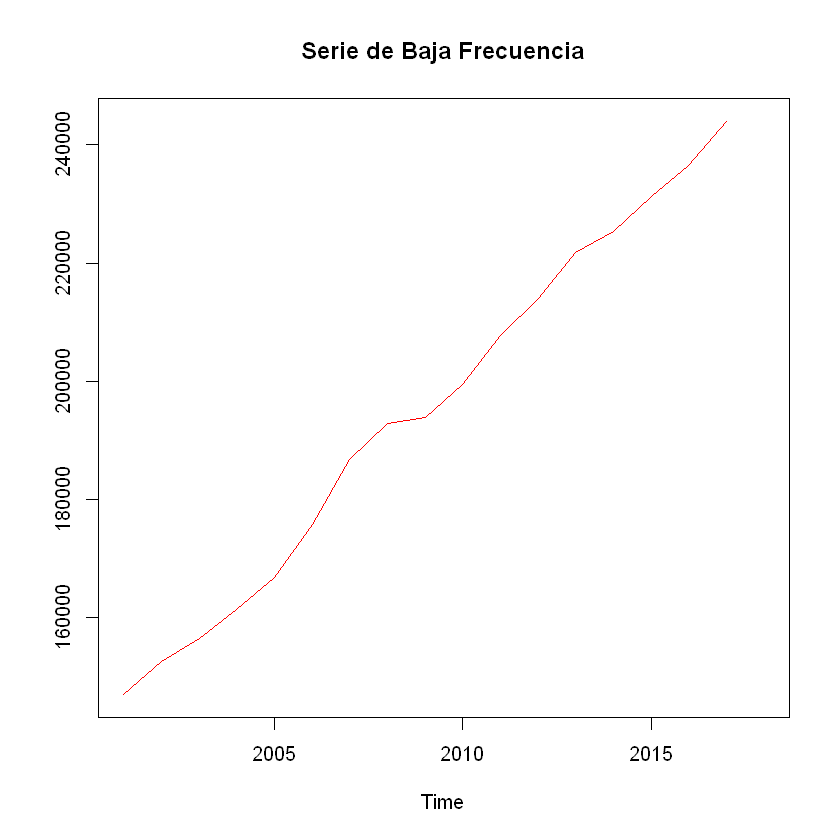

In [12]:
# Graficamos
plot(tsbf_PIB,col = "red",lwd = 1,lty= 1, main="Serie de Baja Frecuencia",ylab=" ")

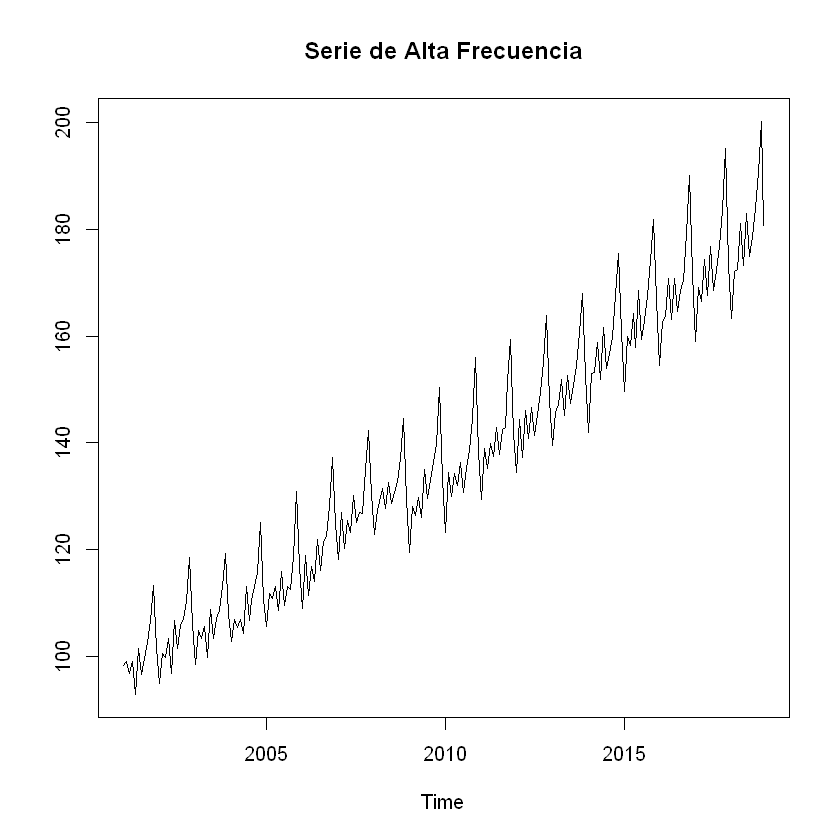

In [13]:
plot(tsaf_IMAE,col = "black",lwd = 1,lty= 1,main="Serie de Alta Frecuencia",ylab=" ")

In [14]:
#-----------Argumentos para la desagregación de series de tiempo--------------#

# Usamos "td"
# td(serie o conjunto de series,

#       conversion = "sum" "average" "first" "last",

#       to = frecuencia de desagregación con número entero (trimestre = 4),
#               si la serie ingresada es objeto ts, el argumento es necesario si
#                   no se da indicador.
#               Si es una matriz, to debe ser un escalar indicando la frecuencia.

#       method = Métodos de Denton
#                   1. "denton-cholette"
#                   2. "denton"
#                   3. "uniform"
#                   4. "ols"

#                Métodos basados en regresión
#                   5. "chow-lin-maxlog" 
#                   6. "chow-lin-minrss-ecotrim"
#                   7. "chow-lin-minrss-quilis"
#                   8. "chow-lin-fixed"
#                   9. "fernandez"
#                   10. "litterman-maxlog"
#                   11. "litterman-minrss"
#                   12. "litterman-fixed"


In [15]:
#                Métodos experimentales
#                   13. "dynamic-maxlog" (experimental)
#                   14. "dynamic-minrss" (experimental)
#                   15. "dynamic-fixed" (experimental)

#       truncated.rho =  límite inferior del parámetro autorregresivo ρ.
#                0 = (default), no acepta valores negativos
#               -1 = truncado.

#       fixed.rho = fija el parametro autorregresivo ρ. 
#               (Solo para "chow-lin-fixed" and "litterman-fixed")

#       start = valor inicial

#       end = valor final

#------->  Sólo para los métodos de Denton

#       criterion = criterio de minimización para los métodos de Denton
#               "proportional" o "additive"

#       h = grado de diferenciación para el método Denton

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

In [16]:
#-----------------------------------------------------------------------------#

#                                   IMPORTANTE

#-----------------------------------------------------------------------------#

# 1) La "conversion" hace que la serie de alta frecuencia resultante es consistente
# con la serie de baja frecuencia. Esta desagregación se puede realizar con o sin
# la ayuda de una o más series de indicadores de referencia.

# 2) Si los indicadores de alta frecuencia cubren un período de tiempo más largo
# que las series de baja frecuencia, se realiza una extrapolación o retropolación
# (Wei, 1994, p. 138), utilizando el mismo modelo que para la interpolación.

# 3) La selección del modelo de desagregación es similar a la selección del modelo
# de regresión lineal. "td" refleja de cerca el funcionamiento de la función lm.
# El lado izquierdo de la fórmula denota las series de baja frecuencia, 
# el lado derecho los indicadores. Si no se especifica ningún indicador, el lado
# derecho debe establecerse igual a 1. A diferencia de lm, td maneja objetos de 
# series temporales ts y mts (matriz).



In [17]:
#-----------------------------------------------------------------------------#

# 4) Para los métodos de mínimos cuadrados generalizados (GLS) "chow-lin-maxlog",
# "chow-lin-minrss-ecotrim", "chow-lin-minrss-quilis", "litterman-maxlog" y 
# "litterman-minrss"; y para el autorregresivo ρ. El método predeterminado 
# (y recomendado) es chow-lin-maxlog. Con truncated.rho = 0 (predeterminado), 
# produce buenos resultados para una amplia gama de aplicaciones.

# 5) Los métodos "dynamic-maxlog", "dynamic-minrss" y "dynamic-fixed" son 
# extensiones dinámicas de Chow-Lin (Santos Silva y Cardoso, 2001). 
# Si el parámetro autorregresivo ρ es igual a 0, no se agrega el resto de
# truncamiento. ESTOS SON MÉTODOS EXPERIMENTALES.

# 6) Los métodos de Denton ("denton" y "denton-cholette") pueden especificarse
# con uno o sin indicador. El parámetro "h" se puede establecer igual a 0, 1 o 2.
# El procedimiento minimiza la suma de cuadrados de las desviaciones del indicador
# y la serie resultante. "denton-cholette" elimina el movimiento transitorio del
# método original "denton" al comienzo de la serie resultante.

# 7) "uniforme" es un caso especial del enfoque "denton", con "h" igual a 0 y
# criterio igual a "proporcional". Distribuye los residuos de manera uniforme.
# Si no se utiliza ningún indicador, esto conduce a una serie en forma de escalón.

# 8) Por último, "ols" realiza una regresión ordinaria de mínimos cuadrados (OLS)
# y distribuye los residuos de manera uniforme. Es especialmente útil para 
# comparar los estimadores de regresiones GLS y OLS.

#-----------------------------------------------------------------------------#

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

In [18]:
# Indicadores de referencia
tsaf1 = tsaf_empleo
tsaf2 = tsaf_IMAE

#bf = tsbf_GCF
bf = tsbf_PIB

# Consistente con:
criterio = "average"

In [19]:
#-----------------------------------------------------------------------------#

#                               Métodos de Denton

# Por un lado, Denton (Denton, 1971) y Denton-Cholette, se preocupan principalmente
# por la preservación del movimiento, generando una serie que es similar a la 
# serie de indicadores, ya sea que el indicador esté o no correlacionado con el 
# nivel bajo de frecuencias. Alternativamente, estos métodos pueden desagregar 
# una serie sin un indicador.

#-----------------------------------------------------------------------------#

In [20]:
#-----------------------------------------------------------------------------#
#                       Método 1 - "Denton-Cholette"
#-----------------------------------------------------------------------------#
dc_si = td(bf ~ 1,                                # sin indicador
            to = 12,                              # mensual
            method = "denton-cholette",
            conversion = criterio,                # consistente con la average
            criterion = "proportional",           # criterio proporcional
            h = 1,                                # primera diferencia
            )

# Extraemos la serie resultante
dc_salida_si = predict(dc_si)

# Resumen del método
summary(dc_si)


Call:
td(formula = bf ~ 1, conversion = criterio, to = 12, method = "denton-cholette", 
    criterion = "proportional", h = 1)

Residuals:
   Min     1Q Median     3Q    Max 
146977 166721 193909 221856 243994 

No Coefficients

'denton-cholette' disaggregation with 'average' conversion
17 low-freq. obs. converted to 204 high-freq. obs.
criterion: proportional 	order of differencing 'h': 1

In [21]:
# Pasamos los datos a Time Series
tsbfa_dc_si = ts(dc_salida_si,
               start= c(2001,1),
               end= c(2017,12),
               frequency=12,
               deltat=1/12,
               ts.eps = 0.05,
               class = "ts"
               )
tsbfa_dc_si

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2001,145670.0,145724.8,145834.6,145999.2,146218.7,146493.1,146822.4,147206.5,147645.5,148139.4,148688.1,149291.8
2002,149950.3,150570.6,151152.6,151696.4,152202.0,152669.4,153098.5,153489.4,153842.1,154156.5,154432.7,154670.7
2003,154870.4,155093.4,155339.8,155609.4,155902.4,156218.7,156558.3,156921.2,157307.4,157716.9,158149.7,158605.8
2004,159085.3,159553.6,160010.9,160457.1,160892.3,161316.3,161729.3,162131.2,162522.1,162901.8,163270.5,163628.2
2005,163974.7,164356.5,164773.7,165226.1,165713.8,166236.9,166795.2,167388.8,168017.8,168682.0,169381.5,170116.3
2006,170886.5,171680.5,172498.4,173340.1,174205.7,175095.2,176008.6,176945.9,177907.0,178892.0,179900.9,180933.7
2007,181990.4,183003.6,183973.4,184899.7,185782.7,186622.2,187418.3,188170.9,188880.1,189545.9,190168.3,190747.3
2008,191282.8,191762.4,192186.0,192553.7,192865.4,193121.3,193321.1,193465.1,193553.0,193585.1,193561.2,193481.3
2009,193345.6,193264.8,193239.0,193268.2,193352.4,193491.6,193685.9,193935.1,194239.3,194598.5,195012.7,195481.9
2010,196006.1,196554.8,197128.1,197725.9,198348.2,198995.0,199666.4,200362.3,201082.7,201827.7,202597.1,203391.2


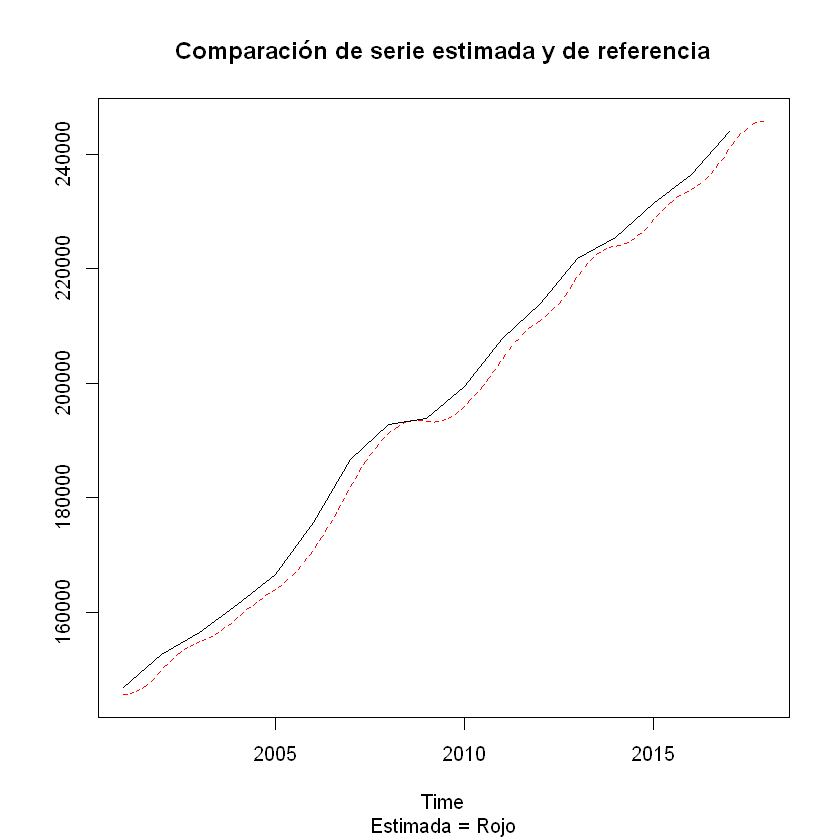

In [22]:
# Graficamos para comparar
plot(tsbfa_dc_si,col = "red", lwd = 1, lty= 2, main="Comparación de serie estimada y de referencia",
         ylab=" ", sub="Estimada = Rojo"); lines(bf,col = "black", lwd = 1, lty= 1, ylab=" ",)

In [23]:
dc_ci = td(bf ~ 0 + tsaf2,                     # con indicador
        to = 12,                               # mensual
        method = "denton-cholette",
        conversion = criterio,                 # consistente con la average
        criterion = "proportional",            # criterio proporcional
        h = 1                                  # primera diferencia
        )
# Extraemos la serie resultante
dc_salida_ci = predict(dc_ci)

# Resumen del método
summary(dc_ci)


Call:
td(formula = bf ~ 0 + tsaf2, conversion = criterio, to = 12, 
    method = "denton-cholette", criterion = "proportional", h = 1)

Residuals:
   Min     1Q Median     3Q    Max 
146877 166608 193777 221706 243822 

No Coefficients

'denton-cholette' disaggregation with 'average' conversion
17 low-freq. obs. converted to 216 high-freq. obs.
criterion: proportional 	order of differencing 'h': 1

In [24]:
# Pasamos los datos a Time Series
tsbfa_dc_ci = ts(dc_salida_ci,
              start= c(2001,1),
              end= c(2018,12), # con pronóstico de un año
              frequency=12,
              deltat=1/12,
              ts.eps = 0.05,
              class = "ts"
             )

tsbfa_dc_ci

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2001,143520.4,144477.9,141111.4,144649.5,135461.9,148166.8,141142.2,145373.2,149881.2,155960.2,165641.9,148347.5
2002,138752.6,147031.8,145917.7,151110.3,141795.0,156297.2,148521.8,154910.1,156798.2,161640.8,173688.0,155467.7
2003,144420.6,153731.7,151487.8,154850.2,146444.9,159534.9,151788.9,157228.9,159291.3,166105.7,175095.7,158312.7
2004,150756.6,156910.6,154792.2,156902.2,152947.0,165910.8,156452.3,161897.4,165865.9,169646.6,183430.5,161986.6
2005,154770.3,163636.1,162188.7,165520.3,158972.2,169557.6,160347.1,165530.9,164472.7,173604.5,191355.9,170707.1
2006,159196.1,173927.6,162905.3,170867.8,166739.3,178207.9,169744.8,177620.3,178895.2,187326.3,200624.3,182239.7
2007,172697.1,185565.8,175722.2,183463.0,180238.4,190446.6,183168.0,185924.8,185891.8,198047.2,208797.6,191240.3
2008,180538.4,187196.6,189611.9,193235.8,187883.9,195029.6,189169.2,192344.7,195345.5,201770.6,212472.2,190139.9
2009,175622.0,188110.4,185488.5,190419.8,184866.4,198001.2,189947.8,194822.4,199642.2,204768.7,220328.1,194897.3
2010,180403.4,196941.0,190337.5,196674.1,193427.6,199819.1,191486.1,198293.7,203126.7,211904.6,228683.5,202588.1


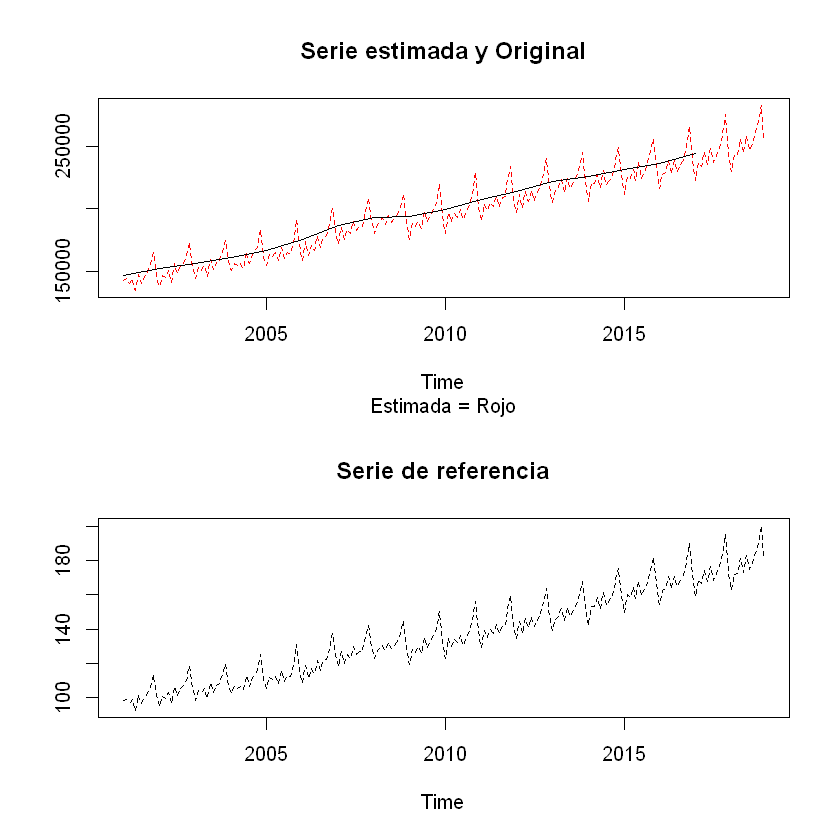

In [25]:
# Graficamos para comparar
par(mfrow=c(2,1))
plot(tsbfa_dc_ci, col = "red", lwd = 1, lty= 2, main="Serie estimada y Original", ylab=" ", sub="Estimada = Rojo"
        ); lines(bf, col = "black", lwd = 1, lty= 1, ylab=" ",)
plot(tsaf_IMAE,col = "black", lwd = 1, lty= 2, main="Serie de referencia",ylab=" ",)

In [26]:
# ----------------------------------------------------------------------------#
#                               Método 2 - "Denton"
# ----------------------------------------------------------------------------#
d_si = td(bf ~ 1,                         # sin indicador
       to = 12,                           # mensual
       method = "denton",
       conversion = criterio,             # consistente con la average
       criterion = "proportional",        # criterio proporcional
       h = 1                              # primera diferencia
       )
# Extraemos la serie resultante
d_salida_si = predict(d_si)

# Resumen del método
summary(d_si)

'denton-cholette' removes the transient movement at the beginning of the series and is preferable to the original 'denton' method in most cases.




Call:
td(formula = bf ~ 1, conversion = criterio, to = 12, method = "denton", 
    criterion = "proportional", h = 1)

Residuals:
   Min     1Q Median     3Q    Max 
146977 166721 193909 221856 243994 

No Coefficients

'denton' disaggregation with 'average' conversion
17 low-freq. obs. converted to 204 high-freq. obs.
criterion: proportional 	order of differencing 'h': 1

In [27]:
# Pasamos los datos a Time Series
tsbfa_d_si = ts(d_salida_si,
             start= c(2001,1),
             end= c(2017,12),
             frequency=12,
             deltat=1/12,
             ts.eps = 0.05,
             class = "ts"
            )

tsbfa_d_si

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2001,36527.14,69258.46,98194.97,123336.67,144683.55,162235.62,175992.88,185955.33,192122.96,194495.78,193073.79,187856.98
2002,178845.36,170814.70,163765.00,157696.25,152608.46,148501.62,145375.74,143230.82,142066.85,141883.84,142681.79,144460.69
2003,147220.55,149733.89,152000.72,154021.03,155794.82,157322.09,158602.85,159637.09,160424.81,160966.02,161260.71,161308.88
2004,161110.54,160972.55,160894.93,160877.67,160920.76,161024.22,161188.04,161412.22,161696.76,162041.66,162446.92,162912.54
2005,163438.52,163980.88,164539.64,165114.77,165706.30,166314.21,166938.51,167579.20,168236.27,168909.73,169599.57,170305.81
2006,171028.42,171779.93,172560.31,173369.58,174207.73,175074.77,175970.69,176895.50,177849.18,178831.76,179843.21,180883.55
2007,181952.77,182977.25,183956.96,184891.93,185782.14,186627.60,187428.31,188184.26,188895.46,189561.91,190183.60,190760.54
2008,191292.73,191769.33,192190.34,192555.76,192865.59,193119.82,193318.47,193461.52,193548.98,193580.86,193557.14,193477.83
2009,193342.93,193262.94,193237.85,193267.67,193352.39,193492.02,193686.56,193936.00,194240.35,194599.60,195013.76,195482.82
2010,196006.79,196555.31,197128.39,197726.01,198348.19,198994.92,199666.21,200362.04,201082.43,201827.37,202596.86,203390.91


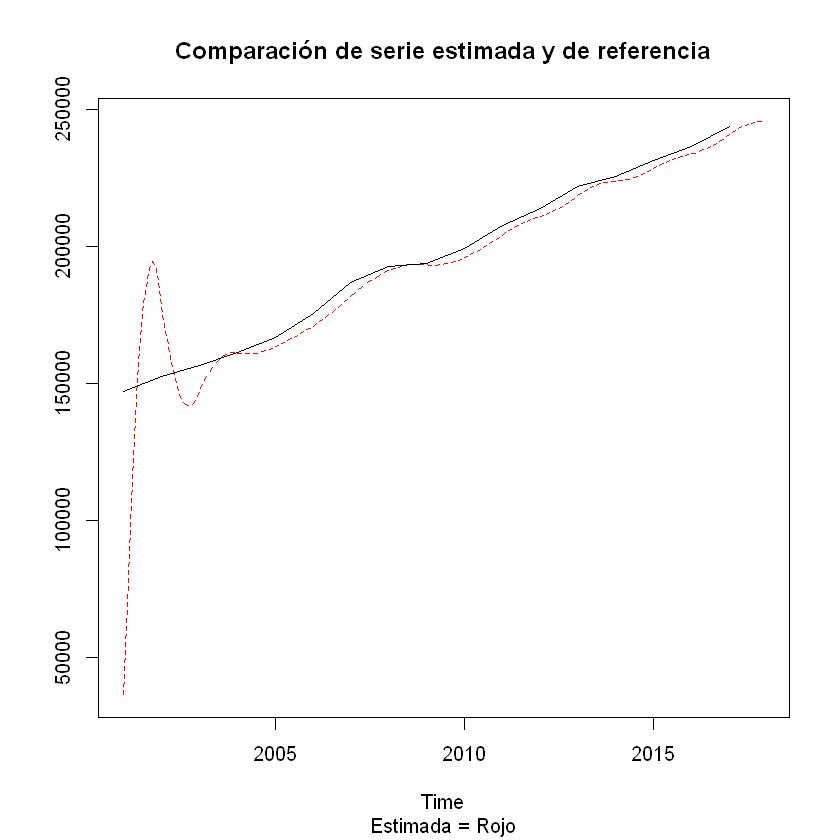

In [28]:
# Graficamos para comparar
plot(tsbfa_d_si,  col = "red", lwd = 1, lty= 2, main="Comparación de serie estimada y de referencia",
            ylab=" ", sub="Estimada = Rojo"); lines(bf, col = "black", lwd = 1, lty= 1, ylab=" ",)


In [29]:
d_ci = td(bf ~ 0 + tsaf2,                 # con indicador
       to = 12,                           # mensual
       method = "denton",
       conversion = criterio,             # consistente con la average
       criterion = "proportional",        # criterio proporcional
       h = 1                              # primera diferencia
        )

# Extraemos la serie resultante
d_salida_ci = predict(d_ci)

# Resumen del método
summary(d_ci)

'denton-cholette' removes the transient movement at the beginning of the series and is preferable to the original 'denton' method in most cases.




Call:
td(formula = bf ~ 0 + tsaf2, conversion = criterio, to = 12, 
    method = "denton", criterion = "proportional", h = 1)

Residuals:
   Min     1Q Median     3Q    Max 
146877 166608 193777 221706 243822 

No Coefficients

'denton' disaggregation with 'average' conversion
17 low-freq. obs. converted to 216 high-freq. obs.
criterion: proportional 	order of differencing 'h': 1

In [30]:
# Pasamos los datos a Time Series
tsbfa_d_ci = ts(d_salida_ci,
             start= c(2001,1),
             end= c(2018,12), # Con pronóstico de un año
             frequency=12,
             deltat=1/12,
             ts.eps = 0.05,
             class = "ts"
            )

tsbfa_d_ci

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2001,35216.78,67165.43,92995.14,119822.78,131709.32,161861.42,167468.94,182565.18,194790.27,205420.31,216543.93,188174.61
2002,167017.07,168378.70,159528.46,158351.28,143118.58,152717.91,141371.09,144568.67,144496.14,148197.24,159674.26,144511.73
2003,136715.90,147905.43,147817.82,152945.12,146127.78,160537.47,153746.42,160021.60,162607.42,169767.09,178835.11,161266.28
2004,152887.59,158488.88,155789.67,157417.81,153037.41,165636.55,155919.18,161136.45,164951.14,168655.97,182391.97,161186.19
2005,154191.40,163201.49,161913.67,165378.31,158948.99,169633.15,160492.80,165737.67,164713.53,173874.31,191645.11,170932.98
2006,159356.05,174052.27,162980.60,170908.55,166747.20,178188.05,169704.70,177561.90,178825.93,187249.26,200544.09,182176.00
2007,172651.48,185530.99,175701.07,183451.84,180236.54,190452.57,183179.77,185941.22,185910.91,198068.78,208819.63,191257.92
2008,180550.92,187205.86,189617.87,193238.85,187884.37,195027.90,189165.91,192340.21,195340.15,201764.76,212466.29,190135.29
2009,175618.74,188107.87,185486.97,190418.94,184866.26,198001.66,189948.68,194823.56,199643.68,204770.26,220329.71,194898.57
2010,180404.28,196941.68,190337.96,196674.32,193427.65,199819.04,191485.87,198293.38,203126.33,211904.17,228683.01,202587.75


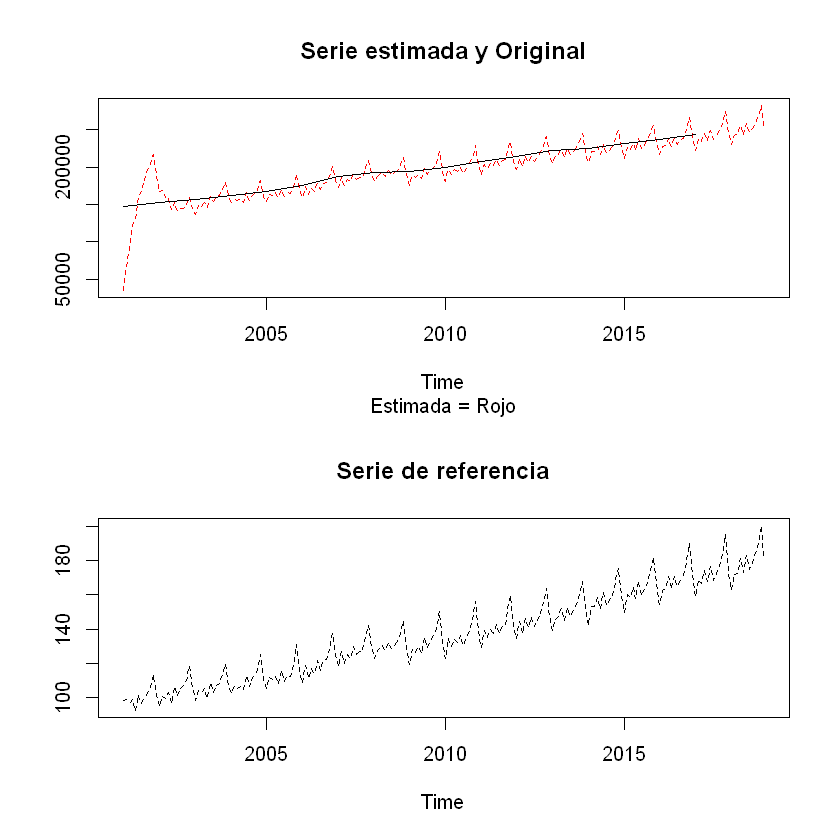

In [31]:
# Graficamos para comparar
par(mfrow=c(2,1))
plot(tsbfa_d_ci, col = "red", lwd = 1, lty= 2, main="Serie estimada y Original",ylab=" ", sub="Estimada = Rojo"
    ); lines(bf, col = "black", lwd = 1, lty= 1, ylab=" ", )
plot(tsaf_IMAE, col = "black", lwd = 1, lty= 2, main="Serie de referencia", ylab=" ",)

In [32]:
# ----------------------------------------------------------------------------#
#                             Método 3 - "Uniforme"
# caso especial del enfoque "denton", con "h" igual a 0 y criterio igual a 
# "proporcional". Distribuye los residuos de manera uniforme. Si no se utiliza 
# ningún indicador, esto conduce a una serie en forma de escalón.
# ----------------------------------------------------------------------------#
uni_si = td(bf ~ 1,                         # sin indicador
         to = 12,                           # mensual
         method = "uniform",
         conversion = criterio,             # consistente con la average
         criterion = "proportional",        # criterio proporcional
         h = 0                              # de nivel
         )
# Extraemos la serie resultante
uni_salida_si = predict(uni_si)

# Resumen del método
summary(uni_si)


Call:
td(formula = bf ~ 1, conversion = criterio, to = 12, method = "uniform", 
    criterion = "proportional", h = 0)

Residuals:
   Min     1Q Median     3Q    Max 
146977 166721 193909 221856 243994 

No Coefficients

'uniform' disaggregation with 'average' conversion
17 low-freq. obs. converted to 204 high-freq. obs.
criterion: additive 	order of differencing 'h': 0

In [33]:
# Pasamos los datos a Time Series
tsbfa_uni_si = ts(uni_salida_si,
           start= c(2001,1),
           end= c(2017,12),
           frequency=12,
           deltat=1/12,
           ts.eps = 0.05,
           class = "ts"
            )

tsbfa_uni_si

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2001,146977.8,146977.8,146977.8,146977.8,146977.8,146977.8,146977.8,146977.8,146977.8,146977.8,146977.8,146977.8
2002,152660.9,152660.9,152660.9,152660.9,152660.9,152660.9,152660.9,152660.9,152660.9,152660.9,152660.9,152660.9
2003,156524.5,156524.5,156524.5,156524.5,156524.5,156524.5,156524.5,156524.5,156524.5,156524.5,156524.5,156524.5
2004,161458.2,161458.2,161458.2,161458.2,161458.2,161458.2,161458.2,161458.2,161458.2,161458.2,161458.2,161458.2
2005,166722.0,166722.0,166722.0,166722.0,166722.0,166722.0,166722.0,166722.0,166722.0,166722.0,166722.0,166722.0
2006,175691.2,175691.2,175691.2,175691.2,175691.2,175691.2,175691.2,175691.2,175691.2,175691.2,175691.2,175691.2
2007,186766.9,186766.9,186766.9,186766.9,186766.9,186766.9,186766.9,186766.9,186766.9,186766.9,186766.9,186766.9
2008,192894.9,192894.9,192894.9,192894.9,192894.9,192894.9,192894.9,192894.9,192894.9,192894.9,192894.9,192894.9
2009,193909.6,193909.6,193909.6,193909.6,193909.6,193909.6,193909.6,193909.6,193909.6,193909.6,193909.6,193909.6
2010,199473.8,199473.8,199473.8,199473.8,199473.8,199473.8,199473.8,199473.8,199473.8,199473.8,199473.8,199473.8


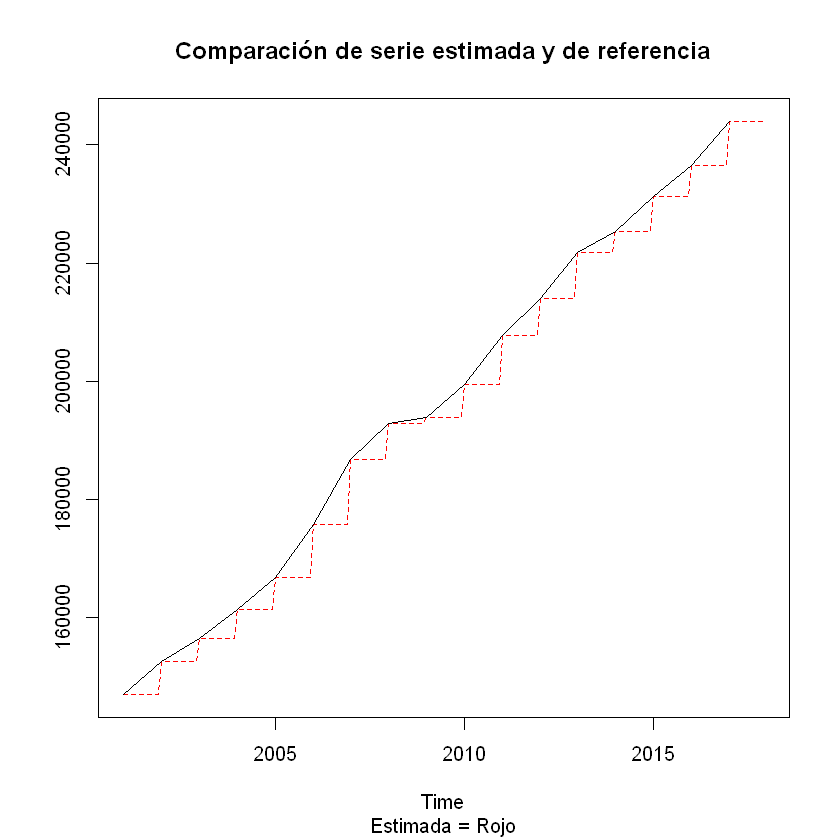

In [34]:
# Graficamos para comparar
plot(tsbfa_uni_si, col = "red", lwd = 1, lty= 2, main="Comparación de serie estimada y de referencia",
            ylab=" ", sub="Estimada = Rojo" ); lines(bf, col = "black", lwd = 1, lty= 1,ylab=" ",)

In [35]:
uni_ci = td(bf ~ 0 + tsaf1,                 # Con indicador
         to = 12,                           # mensual
         method = "uniform",
         conversion = criterio,             # consistente con la average
         criterion = "proportional",        # criterio proporcional
         h = 0                              # de nivel
         )
# Extraemos la serie resultante
uni_salida_ci = predict(uni_ci)

# Resumen del método
summary(uni_ci)


Call:
td(formula = bf ~ 0 + tsaf1, conversion = criterio, to = 12, 
    method = "uniform", criterion = "proportional", h = 0)

Residuals:
     Min       1Q   Median       3Q      Max 
-1069021 -1000442  -894507  -835634  -780779 

No Coefficients

'uniform' disaggregation with 'average' conversion
17 low-freq. obs. converted to 216 high-freq. obs.
criterion: additive 	order of differencing 'h': 0

In [36]:
# Pasamos los datos a Time Series
tsbfa_uni_ci = ts(uni_salida_ci, 
           start= c(2001,1),
           end= c(2017,12),
           frequency=12,
           deltat=1/12,
           ts.eps = 0.05,
           class = "ts"
            )

tsbfa_uni_ci

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2001,155982.2,156324.2,137657.2,162177.2,145277.2,145606.2,151123.2,123451.2,125637.2,137451.2,145073.2,177974.2
2002,149521.3,156688.3,177489.3,145388.3,130492.3,154206.3,150142.3,139772.3,138943.3,142970.3,155852.3,190465.3
2003,166709.7,178134.7,204399.7,175410.7,176566.7,155760.7,159690.7,110397.7,139379.7,133434.7,105488.7,172919.7
2004,173605.2,186040.2,177435.2,169014.2,178366.2,144353.2,146875.2,131749.2,133587.2,148873.2,166230.2,181369.2
2005,192963.0,172612.0,199758.0,187481.0,166961.0,148906.0,162560.0,157830.0,136381.0,142975.0,177568.0,154669.0
2006,167103.2,177297.2,177471.2,180166.2,168150.2,168791.2,173709.2,170203.2,156030.2,171677.2,189613.2,208082.2
2007,170446.9,185690.9,200477.9,188793.9,181608.9,191789.9,191266.9,179639.9,153961.9,175500.9,193408.9,228615.9
2008,223783.9,219168.9,240416.9,229621.9,200714.9,174818.9,165588.9,182463.9,163065.9,147268.9,163493.9,204331.9
2009,218109.6,183111.6,200765.6,179607.6,177116.6,150320.6,164465.6,177205.6,191092.6,201644.6,221579.6,261895.6
2010,239231.1,199602.1,208559.1,203108.1,199682.1,176279.1,184424.1,179452.1,165941.1,178086.1,208081.1,251239.1


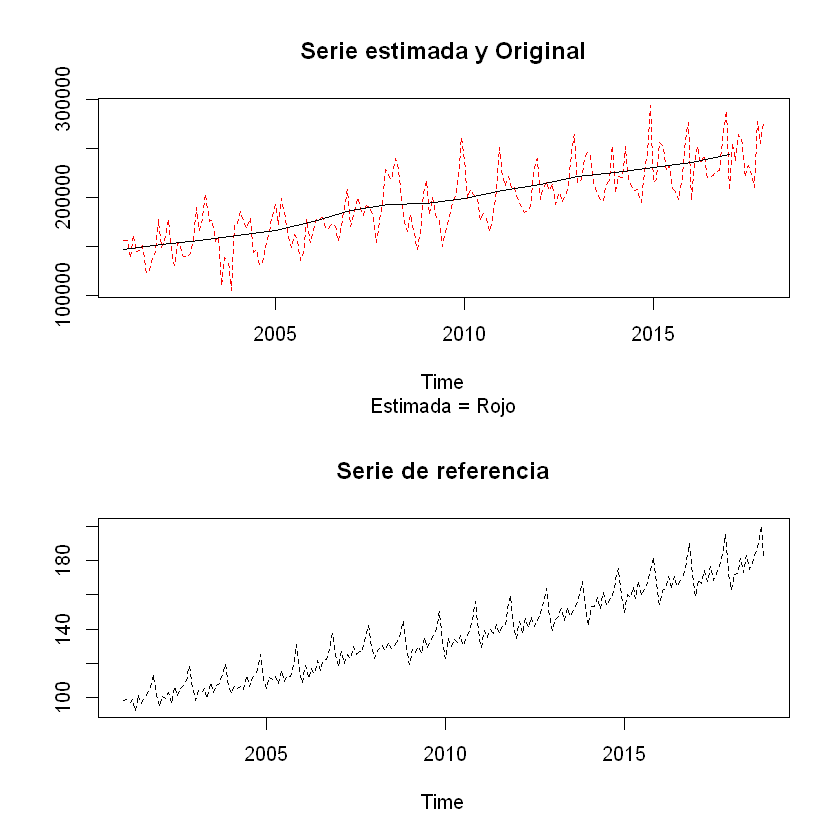

In [37]:
# Graficamos para comparar
par(mfrow=c(2,1))
plot(tsbfa_uni_ci, col = "red", lwd = 1, lty= 2, main="Serie estimada y Original", ylab=" ", sub="Estimada = Rojo"
); lines(bf, col = "black", lwd = 1, lty= 1, ylab=" ", )
plot(tsaf_IMAE, col = "black", lwd = 1, lty= 2, main="Serie de referencia", ylab=" ",)

In [38]:
# ----------------------------------------------------------------------------#
#                             Método 4 - "ols"
# ----------------------------------------------------------------------------#
# ------> No recomendado si no existe un indicador de referencia
ols_si = td(bf ~ 1,                         # sin indicador
         to = 12,                           # mensual
         method = "ols",
         conversion = criterio,             # consistente con la average
         criterion = "proportional",        # criterio proporcional
         h = 0                              # de nivel
         )
# Extraemos la serie resultante
ols_salida_si = predict(ols_si)


Warning message in td(bf ~ 1, to = 12, method = "ols", conversion = criterio, criterion = "proportional", :
"No indicator specified: denton,
               denton-cholette or uniform are recommended."


In [39]:
# Resumen del método
summary(ols_si)


Call:
td(formula = bf ~ 1, conversion = criterio, to = 12, method = "ols", 
    criterion = "proportional", h = 0)

Residuals:
   Min     1Q Median     3Q    Max 
-47957 -28213  -1025  26923  49060 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   194935       7568   25.76 1.88e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

'ols' disaggregation with 'average' conversion
17 low-freq. obs. converted to 204 high-freq. obs.
Adjusted R-squared: -1.332e-15	AR1-Parameter:     0

In [40]:
# Pasamos los datos a Time Series
tsbfa_ols_si = ts(ols_salida_si,
           start= c(2001,1),
           end= c(2017,12),
           frequency=12,
           deltat=1/12,
           ts.eps = 0.05,
           class = "ts"
            )

tsbfa_ols_si

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2001,146977.8,146977.8,146977.8,146977.8,146977.8,146977.8,146977.8,146977.8,146977.8,146977.8,146977.8,146977.8
2002,152660.9,152660.9,152660.9,152660.9,152660.9,152660.9,152660.9,152660.9,152660.9,152660.9,152660.9,152660.9
2003,156524.5,156524.5,156524.5,156524.5,156524.5,156524.5,156524.5,156524.5,156524.5,156524.5,156524.5,156524.5
2004,161458.2,161458.2,161458.2,161458.2,161458.2,161458.2,161458.2,161458.2,161458.2,161458.2,161458.2,161458.2
2005,166722.0,166722.0,166722.0,166722.0,166722.0,166722.0,166722.0,166722.0,166722.0,166722.0,166722.0,166722.0
2006,175691.2,175691.2,175691.2,175691.2,175691.2,175691.2,175691.2,175691.2,175691.2,175691.2,175691.2,175691.2
2007,186766.9,186766.9,186766.9,186766.9,186766.9,186766.9,186766.9,186766.9,186766.9,186766.9,186766.9,186766.9
2008,192894.9,192894.9,192894.9,192894.9,192894.9,192894.9,192894.9,192894.9,192894.9,192894.9,192894.9,192894.9
2009,193909.6,193909.6,193909.6,193909.6,193909.6,193909.6,193909.6,193909.6,193909.6,193909.6,193909.6,193909.6
2010,199473.8,199473.8,199473.8,199473.8,199473.8,199473.8,199473.8,199473.8,199473.8,199473.8,199473.8,199473.8


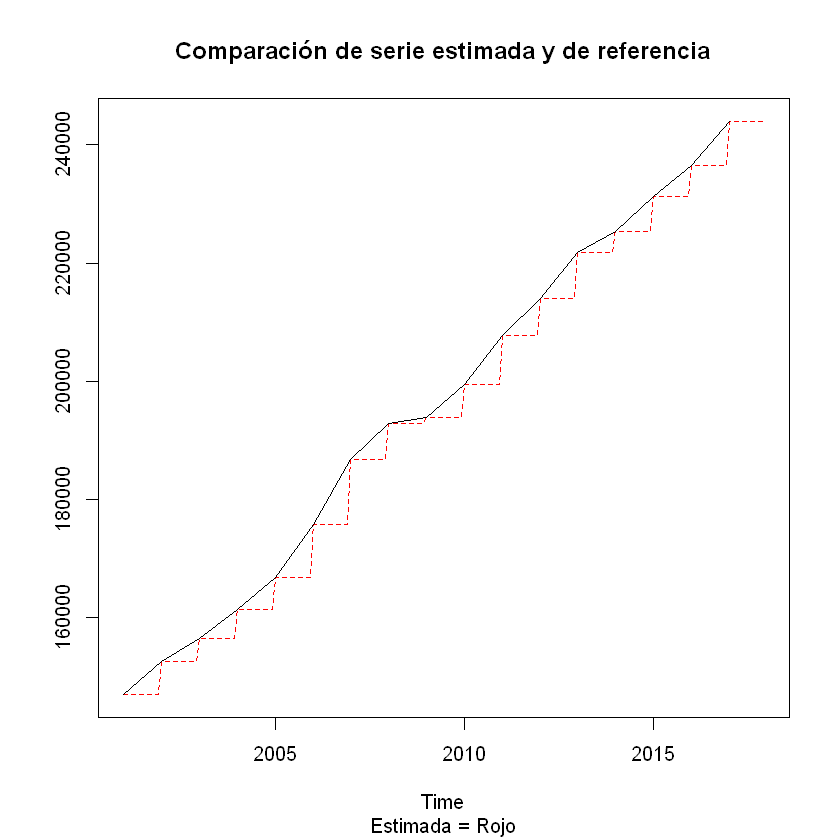

In [41]:
# Graficamos para comparar
plot(tsbfa_ols_si, col = "red", lwd = 1, lty= 2, main="Comparación de serie estimada y de referencia", ylab=" ",
            sub="Estimada = Rojo"); lines(bf, col = "black",lwd = 1,lty= 1,ylab=" ",)

In [42]:
ols_ci = td(bf ~ 0 + tsaf1 + tsaf2,         # Con indicador
         to = 12,                           # mensual
         method = "ols",
         conversion = criterio,             # consistente con la average
         truncated.rho = 0,                 # p autorregresivo no acepta negativos
         criterion = "proportional",        # criterio proporcional
         h = 0                              # de nivel
         )
# Extraemos la serie resultante
ols_salida_ci = predict(ols_ci)


In [43]:
# Resumen del método
summary(ols_ci)


Call:
td(formula = bf ~ 0 + tsaf1 + tsaf2, conversion = criterio, to = 12, 
    method = "ols", truncated.rho = 0, criterion = "proportional", 
    h = 0)

Residuals:
    Min      1Q  Median      3Q     Max 
-4632.4 -2305.6  -598.2  2903.8  3697.9 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
tsaf1 4.230e-02  1.035e-02   4.085 0.000975 ***
tsaf2 1.100e+03  8.479e+01  12.972 1.48e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

'ols' disaggregation with 'average' conversion
17 low-freq. obs. converted to 216 high-freq. obs.
Adjusted R-squared: 0.9921	AR1-Parameter:     0

In [44]:
# Pasamos los datos a Time Series
tsbfa_ols_ci = ts(ols_salida_ci, 
           start= c(2001,1),
           end= c(2018,12), # con pronóstico
           frequency=12,
           deltat=1/12,
           ts.eps = 0.05,
           class = "ts"
            )

tsbfa_ols_ci

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2001,144822.1,145555.5,142223.1,145918.5,138269.1,147842.8,142767.2,144764.7,148229.7,153280.1,160859.5,149201.9
2002,142246.3,148743.6,148753.0,151266.0,143605.0,155472.1,149430.3,153759.1,155112.2,158888.2,168443.1,156212.1
2003,147955.3,155398.7,154808.0,156085.4,149820.7,158738.3,153091.1,155075.5,157842.4,162695.1,168250.1,158532.8
2004,153858.9,159005.3,157065.1,158303.5,155749.7,164047.3,157082.4,160548.0,163627.2,167138.0,178247.3,162826.2
2005,158713.5,164542.3,164633.3,166645.3,160882.1,168099.1,161774.0,165491.2,163805.7,170968.8,185799.6,169308.5
2006,162906.1,174428.4,166147.6,172257.1,168644.7,177303.1,171142.0,176917.9,177273.9,184274.0,195030.3,181969.6
2007,175713.6,186021.8,179220.3,184517.9,181753.9,189814.1,184273.5,185796.7,184623.4,194584.5,203321.8,191561.4
2008,185136.3,189849.8,192491.3,194693.2,189430.6,193652.3,188870.3,191960.2,193399.2,197565.8,206303.0,191386.5
2009,180959.6,188895.5,187739.3,190596.4,186378.1,195142.2,189739.5,193971.3,198206.4,202525.7,215070.3,197690.7
2010,186890.8,197635.3,193053.5,197576.3,194985.2,198782.6,192855.4,197737.1,200770.7,207844.9,221670.5,203883.2


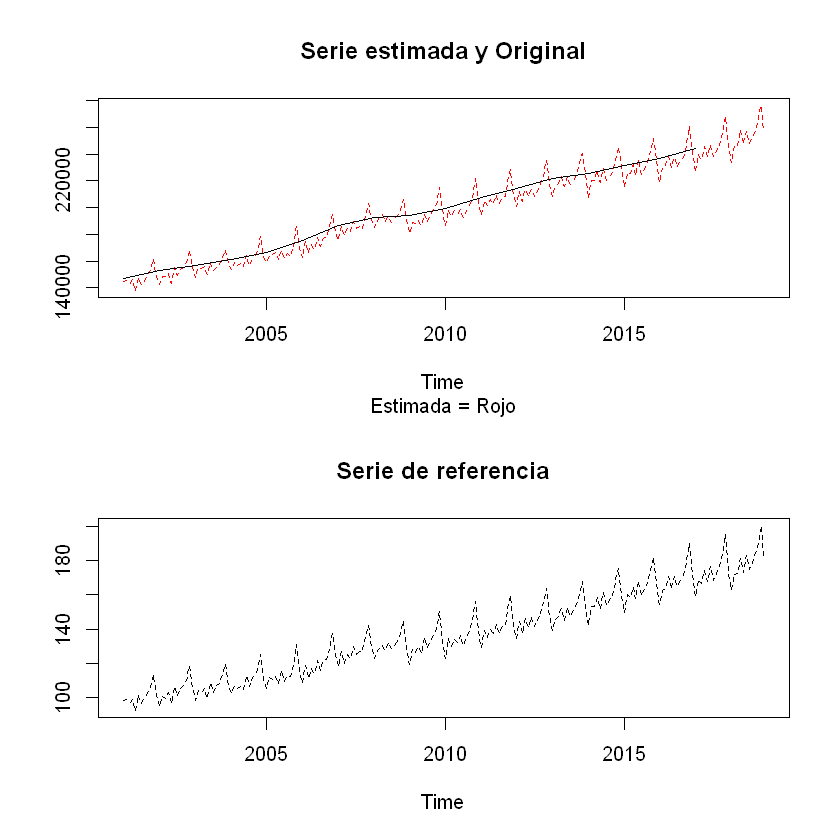

In [45]:
# Graficamos para comparar
par(mfrow=c(2,1))
plot(tsbfa_ols_ci, col = "red",lwd = 1,lty= 2,main="Serie estimada y Original",ylab=" ",sub="Estimada = Rojo"
); lines(bf, col = "black",lwd = 1,lty= 1,ylab=" ",)
plot(tsaf_IMAE, col = "black",lwd = 1,lty= 2,main="Serie de referencia",ylab=" ",)

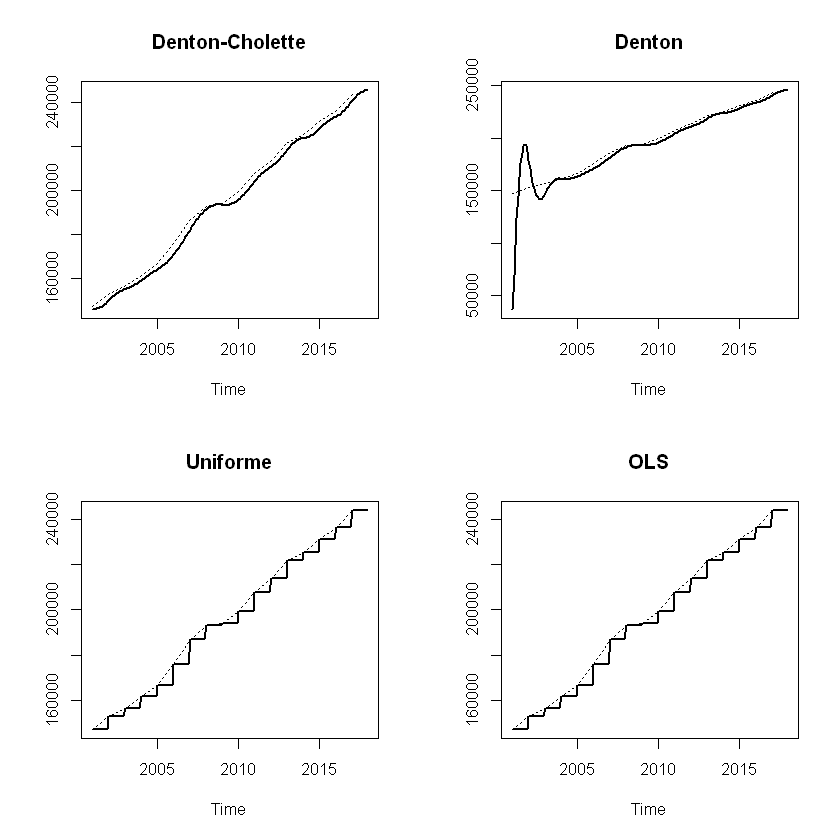

In [46]:
# Comparación de resultados de los Métodos Denton

# Series sin indicador
par(mfrow=c(2,2))
plot(tsbfa_dc_si, lwd = 2, lty= 1, main="Denton-Cholette", ylab=" ");lines(bf, lwd = 1, lty= 3)
plot(tsbfa_d_si, lwd = 2, lty= 1, main="Denton", ylab=" ");lines(bf, lwd = 1, lty= 3)
plot(tsbfa_uni_si, lwd = 2, lty= 1, main="Uniforme", ylab=" ");lines(bf, lwd = 1, lty= 3)
plot(tsbfa_ols_si, lwd = 2, lty= 1, main="OLS", ylab=" ");lines(bf, lwd = 1, lty= 3)

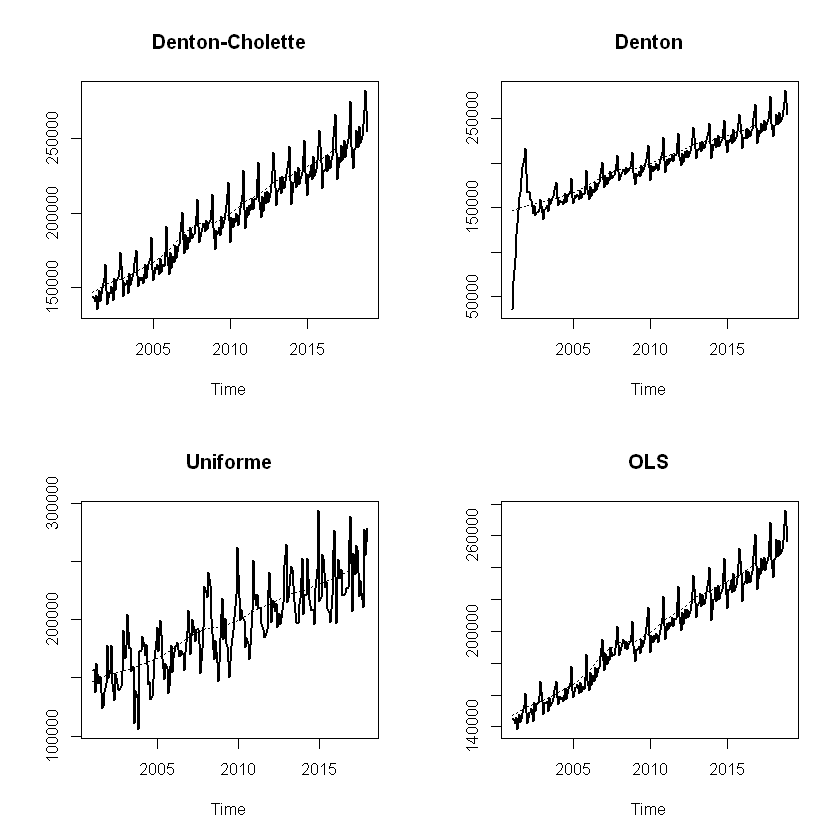

In [47]:
# Series con indicador
par(mfrow=c(2,2))
plot(tsbfa_dc_ci, lwd = 2, lty= 1, main="Denton-Cholette", ylab=" ");lines(bf, lwd = 1, lty= 3)
plot(tsbfa_d_ci, lwd = 2, lty= 1, main="Denton", ylab=" ");lines(bf, lwd = 1, lty= 3)
plot(tsbfa_uni_ci, lwd = 2, lty= 1, main="Uniforme", ylab=" ");lines(bf, lwd = 1, lty= 3)
plot(tsbfa_ols_ci, lwd = 2, lty= 1, main="OLS", ylab=" ");lines(bf, lwd = 1, lty= 3)

In [48]:
# Consistencia de la serie estimada, con el promedio
bf[1] # primer valor de la serie de baja frecuencia
mean(tsbfa_dc_si[1:12])
mean(tsbfa_d_si[1:12])
mean(tsbfa_uni_si[1:12])
mean(tsbfa_ols_si[1:12])
mean(tsbfa_dc_ci[1:12])
mean(tsbfa_d_ci[1:12])
mean(tsbfa_uni_ci[1:12])
mean(tsbfa_ols_ci[1:12])

[1] 146977.8

[1] 146977.8

[1] 146977.8

[1] 146977.8

[1] 146977.8

[1] 146977.8

[1] 146977.8

[1] 146977.8

[1] 146977.8

In [49]:
#-----------------------------------------------------------------------------#
#                       Métodos basados en regresión
# Por otro lado, Chow-Lin, Fernández y Litterman usan uno o varios indicadores 
# y realizan una regresión en las series de baja frecuencia. Chow-Lin 
# (Chow y Lin, 1971) es adecuado para series estacionarias o cointegradas, mientras
# que Fernández (Fernández, 1981) y Litterman (Litterman, 1983) se ocupan de series
# no cointegradas.
#-----------------------------------------------------------------------------#
#                             Método 5 - "chow-lin"
#                   Para series estacionarias o cointegradas
#----------> incluye
#               a. "chow-lin-maxlog" 
#               b. "chow-lin-minrss-ecotrim"
#               c. "chow-lin-minrss-quilis"
#               d. "chow-lin-fixed"
#----------> Recomendado: chow-lin-maxlog
#----------> Con truncated.rho = 0
#----------> Sin indicador se recomienda Denton
# ----------------------------------------------------------------------------#

In [50]:
# a. "chow-lin-maxlog"
cl_ml_a = td(bf ~ 0 + tsaf1 + tsaf2,            # con indicador
             to = 12,                           # mensual
             method = "chow-lin-maxlog",
             conversion = criterio,             # consistente con la average
             truncated.rho = 0,                 # p autorregresivo no acepta negativos
             #fixed.rho = 0.5,                  # p autorregresivo fijo
             )

# Extraemos la serie resultante
cl_ml_a_salida = predict(cl_ml_a)

In [51]:
# Resumen del método
summary(cl_ml_a)
logl_a = summary(cl_ml_a)$logl              # logl
rsqrt_a = summary(cl_ml_a)$adj.r.squared    # r cuadrado ajustado
rho_a = summary(cl_ml_a)$rho                # rho

compa_a = c(logl_a, rsqrt_a, rho_a)


Call:
td(formula = bf ~ 0 + tsaf1 + tsaf2, conversion = criterio, to = 12, 
    method = "chow-lin-maxlog", truncated.rho = 0)

Residuals:
    Min      1Q  Median      3Q     Max 
-4115.2 -1465.5   -32.8  3530.0  4364.8 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
tsaf1 3.887e-02  1.578e-02   2.463   0.0263 *  
tsaf2 1.123e+03  1.281e+02   8.770 2.73e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

'chow-lin-maxlog' disaggregation with 'average' conversion
17 low-freq. obs. converted to 216 high-freq. obs.
Adjusted R-squared: 0.9774	AR1-Parameter: 0.9749

In [52]:
# Pasamos los datos a Time Series
tsbfa_cl_ml_a = ts(cl_ml_a_salida,
                   start= c(2001,1),
                   end= c(2018,12),
                   frequency=12,
                   deltat=1/12,
                   ts.eps = 0.05,
                   class = "ts"
                    )

tsbfa_cl_ml_a

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2001,144786.5,145491.5,142137.0,145782.4,138032.0,147804.6,142605.6,144782.8,148339.5,153483.7,161238.5,149250.2
2002,141568.6,148244.4,148240.3,151025.2,143350.6,155454.4,149394.7,153956.3,155442.5,159386.0,169196.8,156671.5
2003,147420.8,155076.3,154449.2,155954.0,149612.7,158855.4,153104.1,155361.6,158065.7,163036.4,168805.1,158552.2
2004,153764.4,158920.2,156937.6,158207.5,155535.3,164138.6,157006.0,160607.9,163749.3,167280.3,178568.9,162782.7
2005,158087.4,164167.7,164190.1,166351.3,160614.9,168129.2,161684.7,165581.2,164039.7,171419.7,186515.4,169882.1
2006,162231.3,174059.8,165701.8,172019.5,168465.4,177379.0,171133.4,177105.8,177582.2,184706.6,195649.0,182260.8
2007,174875.4,185380.0,178438.3,183989.6,181312.7,189637.5,184143.8,185935.0,185057.2,195369.3,204471.7,192592.3
2008,184165.2,189262.1,192088.6,194562.4,189449.7,193966.7,189175.4,192267.4,193788.2,198036.6,206771.8,191204.3
2009,181086.2,189165.2,187757.7,190641.4,186244.6,195234.9,189607.1,193848.7,198113.7,202504.2,215278.5,197432.8
2010,186056.5,197293.5,192663.4,197386.1,194829.0,198875.4,192848.8,197909.8,201114.1,208327.3,222351.1,204030.3


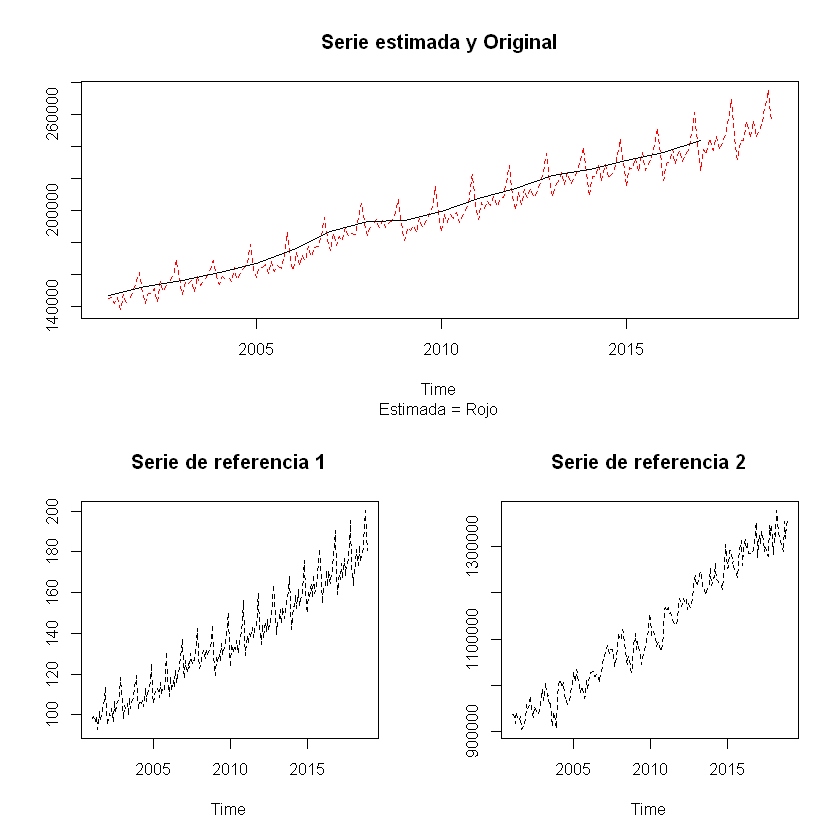

In [53]:
# Graficamos para comparar
layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))
plot(tsbfa_cl_ml_a, col = "red", lwd = 1, lty= 2,main="Serie estimada y Original",ylab=" ",sub="Estimada = Rojo"
); lines(bf, col = "black",lwd = 1,lty= 1,ylab=" ",)
plot(tsaf_IMAE, col = "black",lwd = 1,lty= 2,main="Serie de referencia 1",ylab=" ",)
plot(tsaf_empleo, col = "black",lwd = 1,lty= 2,main="Serie de referencia 2",ylab=" ",)

In [54]:
# b. "chow-lin-minrss-ecotrim"
cl_ml_b = td(bf ~ 0 + tsaf1 + tsaf2,            # con indicador
             to = 12,                           # mensual
             method = "chow-lin-minrss-ecotrim",
             conversion = criterio,             # consistente con la average
             truncated.rho = 0,                 # p autorregresivo no acepta negativos
             #fixed.rho = 0.5,                  # p autorregresivo fijo
             )
# Extraemos la serie resultante
cl_ml_b_salida = predict(cl_ml_b)



In [55]:
# Resumen del método
summary(cl_ml_b)
logl_b = summary(cl_ml_b)$logl              # logl
rsqrt_b = summary(cl_ml_b)$adj.r.squared    # r cuadrado ajustado
rho_b = summary(cl_ml_b)$rho                # rho

compa_b = c(logl_b, rsqrt_b, rho_b)
compa_b


Call:
td(formula = bf ~ 0 + tsaf1 + tsaf2, conversion = criterio, to = 12, 
    method = "chow-lin-minrss-ecotrim", truncated.rho = 0)

Residuals:
   Min     1Q Median     3Q    Max 
 -4422  -1916   -361   3178   3988 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
tsaf1 4.059e-02  1.217e-02   3.334  0.00453 ** 
tsaf2 1.112e+03  9.932e+01  11.193 1.11e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

'chow-lin-minrss-ecotrim' disaggregation with 'average' conversion
17 low-freq. obs. converted to 216 high-freq. obs.
Adjusted R-squared: 0.9883	AR1-Parameter: 0.9413

[1] -149.5603426    0.9882712    0.9412972

In [56]:
# Pasamos los datos a Time Series
tsbfa_cl_ml_b = ts(cl_ml_b_salida,
                   start= c(2001,1),
                   end= c(2018,12),
                   frequency=12,
                   deltat=1/12,
                   ts.eps = 0.05,
                   class = "ts"
                    )

tsbfa_cl_ml_b

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2001,145067.0,145692.4,142268.6,145874.1,138120.7,147757.8,142594.3,144670.8,148184.1,153297.7,160995.1,149211.4
2002,141611.5,148254.2,148310.2,151012.8,143395.6,155435.8,149435.9,153935.0,155408.6,159324.0,169065.3,156742.2
2003,147539.7,155142.9,154577.6,156005.2,149729.3,158832.8,153146.1,155274.6,158010.2,162915.7,168564.5,158554.9
2004,153868.9,158996.5,157014.5,158253.0,155627.5,164072.2,157017.9,160552.7,163667.7,167197.4,178410.8,162819.6
2005,158217.4,164196.2,164278.1,166393.4,160673.4,168075.2,161726.4,165575.4,164006.8,171329.3,186349.6,169842.4
2006,162334.7,174070.9,165802.1,172064.6,168523.2,177349.3,171178.2,177083.4,177525.6,184611.5,195481.9,182269.3
2007,174956.6,185387.8,178547.7,184017.7,181352.2,189613.7,184174.6,185924.2,185003.8,195262.0,204317.8,192644.6
2008,184294.3,189342.0,192193.4,194625.4,189507.4,193926.2,189164.8,192260.6,193723.5,197892.6,206569.1,191238.9
2009,181274.5,189191.7,187831.8,190639.5,186281.1,195124.0,189584.0,193811.2,198064.5,202435.7,215126.2,197550.7
2010,186275.1,197318.4,192756.2,197420.4,194881.8,198836.8,192886.6,197883.8,201024.7,208187.8,222130.3,204083.5


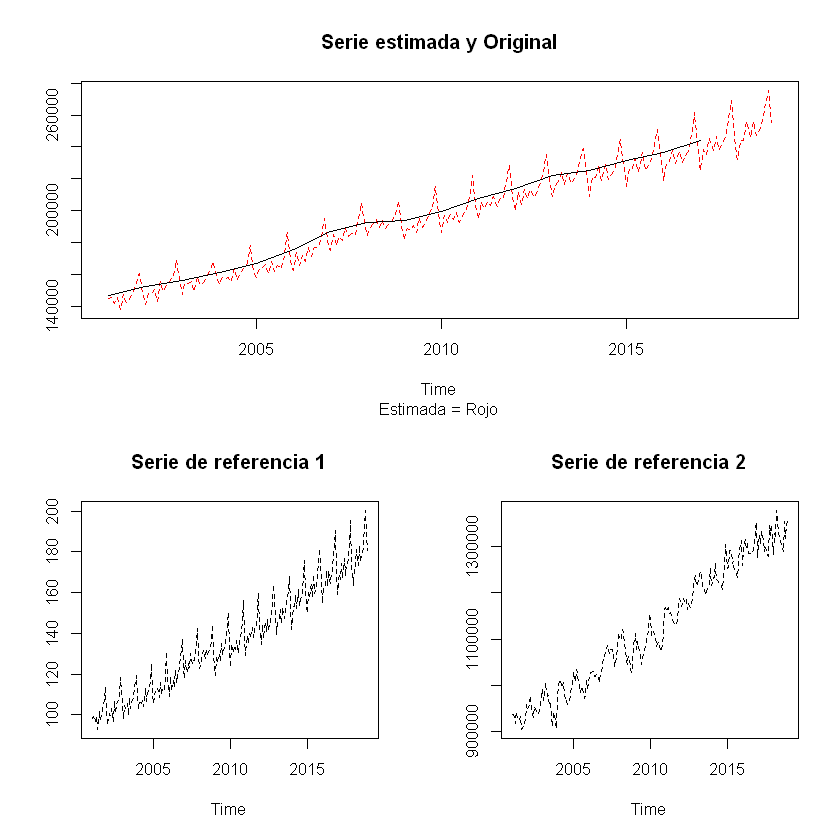

In [57]:
# Graficamos para comparar
layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))
plot(tsbfa_cl_ml_b, col = "red", lwd = 1,lty= 2,main="Serie estimada y Original",ylab=" ",sub="Estimada = Rojo"
); lines(bf, col = "black",lwd = 1,lty= 1,ylab=" ",)
plot(tsaf_IMAE, col = "black",lwd = 1,lty= 2,main="Serie de referencia 1",ylab=" ",)
plot(tsaf_empleo, col = "black",lwd = 1,lty= 2,main="Serie de referencia 2",ylab=" ",)

In [58]:
# c. "chow-lin-minrss-quilis"
cl_ml_c = td(bf ~ 0 + tsaf1 + tsaf2,            # con indicador
             to = 12,                           # mensual
             method = "chow-lin-minrss-quilis",
             conversion = criterio,             # consistente con la average
             truncated.rho = 0,                 # p autorregresivo no acepta negativos
             #fixed.rho = 0.5,                  # p autorregresivo fijo
             )
# Extraemos la serie resultante
cl_ml_c_salida = predict(cl_ml_c)

In [59]:
# Resumen del método
summary(cl_ml_c)
logl_c = summary(cl_ml_c)$logl              # logl
rsqrt_c = summary(cl_ml_c)$adj.r.squared    # r cuadrado ajustado
rho_c = summary(cl_ml_c)$rho                # rho

compa_c = c(logl_c, rsqrt_c, rho_c)


Call:
td(formula = bf ~ 0 + tsaf1 + tsaf2, conversion = criterio, to = 12, 
    method = "chow-lin-minrss-quilis", truncated.rho = 0)

Residuals:
    Min      1Q  Median      3Q     Max 
-1184.6   889.1  2784.4  6097.2  7189.6 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
tsaf1 3.546e-02  2.634e-02   1.346    0.198    
tsaf2 1.132e+03  1.916e+02   5.909 2.87e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

'chow-lin-minrss-quilis' disaggregation with 'average' conversion
17 low-freq. obs. converted to 216 high-freq. obs.
Adjusted R-squared: 0.917	AR1-Parameter: 0.999

In [60]:
# Pasamos los datos a Time Series
tsbfa_cl_ml_c = ts(cl_ml_c_salida,
                   start= c(2001,1),
                   end= c(2018,12),
                   frequency=12,
                   deltat=1/12,
                   ts.eps = 0.05,
                   class = "ts"
                    )

tsbfa_cl_ml_c

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2001,144562.9,145320.2,142051.4,145672.4,137956.5,147833.5,142595.8,144911.6,148501.7,153651.0,161442.3,149234.7
2002,141518.2,148214.3,148127.0,151048.5,143363.7,155471.1,149374.4,154007.2,155504.8,159461.3,169298.8,156541.9
2003,147299.3,154971.1,154240.6,155865.8,149471.7,158868.2,153060.6,155524.8,158148.7,163188.2,169115.2,158539.3
2004,153624.5,158784.4,156826.7,158145.4,155423.6,164227.2,157033.0,160723.3,163885.1,167388.7,178702.7,162734.3
2005,157926.3,164129.3,164049.7,166272.8,160566.4,168206.9,161659.7,165604.1,164129.5,171542.7,186628.5,169947.3
2006,162131.7,174016.3,165592.7,171953.5,168420.1,177407.6,171100.9,177141.7,177683.7,184816.6,195790.4,182239.4
2007,174814.9,185357.7,178315.6,183962.2,181296.7,189653.5,184119.8,185968.1,185176.1,195484.6,204584.6,192469.0
2008,184004.9,189148.2,191909.1,194435.9,189385.5,194031.9,189235.9,192290.5,193898.3,198243.9,206994.5,191159.7
2009,180865.6,189148.2,187671.6,190663.5,186246.5,195412.3,189690.3,193920.4,198168.8,202555.1,215355.9,197216.6
2010,185782.3,197254.9,192554.9,197337.3,194775.9,198946.3,192847.4,197974.5,201263.1,208498.2,222532.7,203918.0


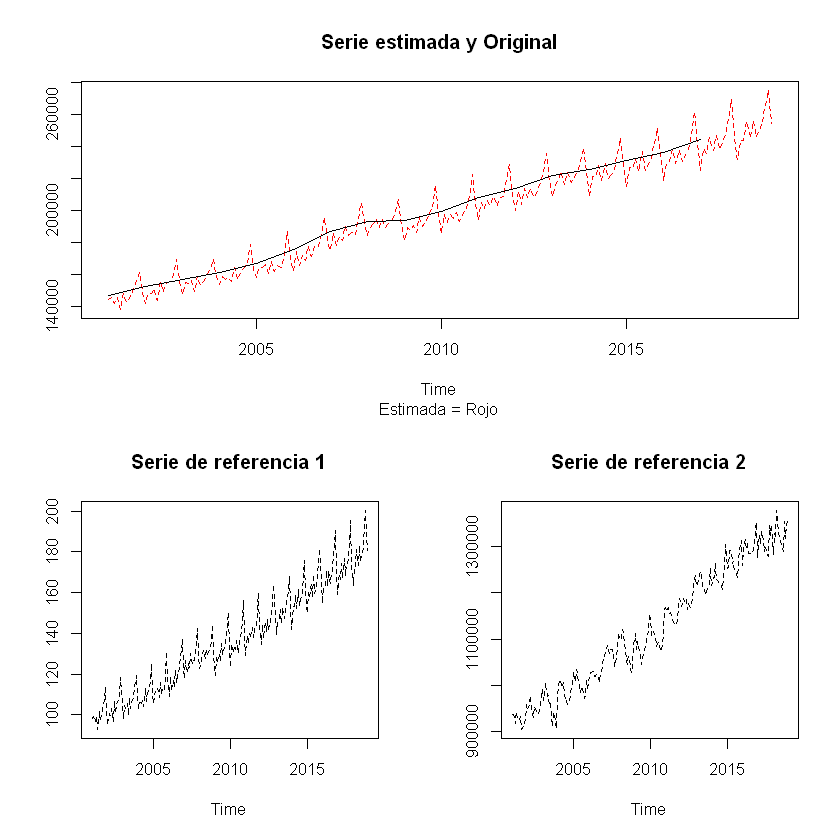

In [61]:
# Graficamos para comparar 
layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))
plot(tsbfa_cl_ml_c, col = "red",lwd = 1,lty= 2,main="Serie estimada y Original",ylab=" ",sub="Estimada = Rojo"
); lines(bf, col = "black",lwd = 1,lty= 1,ylab=" ",)
plot(tsaf_IMAE, col = "black",lwd = 1,lty= 2,main="Serie de referencia 1",ylab=" ",)
plot(tsaf_empleo, col = "black",lwd = 1,lty= 2,main="Serie de referencia 2",ylab=" ",)

In [62]:
# d. "chow-lin-fixed"
cl_ml_d = td(bf ~ 0 + tsaf1 + tsaf2,            # con indicador
             to = 12,                           # mensual
             method = "chow-lin-fixed",
             conversion = criterio,             # consistente con la average
             truncated.rho = 0,                 # p autorregresivo no acepta negativos
             #fixed.rho = 0.5,                  # p autorregresivo fijo
             )
# Extraemos la serie resultante
cl_ml_d_salida = predict(cl_ml_d)

In [63]:
# Resumen del método
summary(cl_ml_d)
logl_d = summary(cl_ml_d)$logl              # logl
rsqrt_d = summary(cl_ml_d)$adj.r.squared    # r cuadrado ajustado
rho_d = summary(cl_ml_d)$rho                # rho

compa_d = c(logl_d, rsqrt_d, rho_d)


Call:
td(formula = bf ~ 0 + tsaf1 + tsaf2, conversion = criterio, to = 12, 
    method = "chow-lin-fixed", truncated.rho = 0)

Residuals:
    Min      1Q  Median      3Q     Max 
-4612.4 -2288.4  -578.8  2921.8  3717.7 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
tsaf1 4.226e-02  1.039e-02   4.069  0.00101 ** 
tsaf2 1.100e+03  8.503e+01  12.936 1.54e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

'chow-lin-fixed' disaggregation with 'average' conversion
17 low-freq. obs. converted to 216 high-freq. obs.
Adjusted R-squared: 0.992	AR1-Parameter:   0.5

In [64]:
# Pasamos los datos a Time Series
tsbfa_cl_ml_d = ts(cl_ml_d_salida,
                   start= c(2001,1),
                   end= c(2018,12),
                   frequency=12,
                   deltat=1/12,
                   ts.eps = 0.05,
                   class = "ts"
                    )

tsbfa_cl_ml_d

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2001,145657.5,145860.1,142262.8,145825.5,138110.7,147654.6,142566.2,144565.9,148045.5,153131.0,160783.8,149270.7
2002,141938.3,148583.8,148666.5,151218.6,143577.1,155456.9,149424.8,153768.3,155145.8,158968.5,168616.2,156566.3
2003,147662.2,155289.8,154789.9,156114.2,149871.5,158801.7,153158.0,155144.6,157906.7,162749.8,168284.9,158520.1
2004,153906.9,159009.4,157047.4,158275.6,155716.2,164014.4,157049.5,160519.9,163608.2,167136.7,178282.8,162931.7
2005,158527.9,164430.7,164557.2,166588.9,160836.2,168062.2,161744.0,165474.9,163814.3,171025.7,185951.9,169649.5
2006,162538.6,174251.7,166065.0,172223.2,168635.7,177309.3,171158.0,176947.0,177324.0,184362.8,195195.5,182283.8
2007,175325.0,185785.2,179058.5,184396.5,181654.6,189731.2,184207.5,185759.3,184639.3,194704.0,203647.1,192294.6
2008,184512.6,189637.3,192483.1,194787.5,189575.3,193821.1,189045.9,192130.1,193549.6,197671.8,206316.0,191208.1
2009,181238.3,188988.0,187737.0,190548.5,186307.0,195062.9,189656.3,193891.4,198137.4,202480.9,215075.5,197791.7
2010,186710.0,197556.6,193023.7,197572.2,194993.6,198799.1,192875.2,197761.5,200801.3,207885.5,221730.3,203976.4


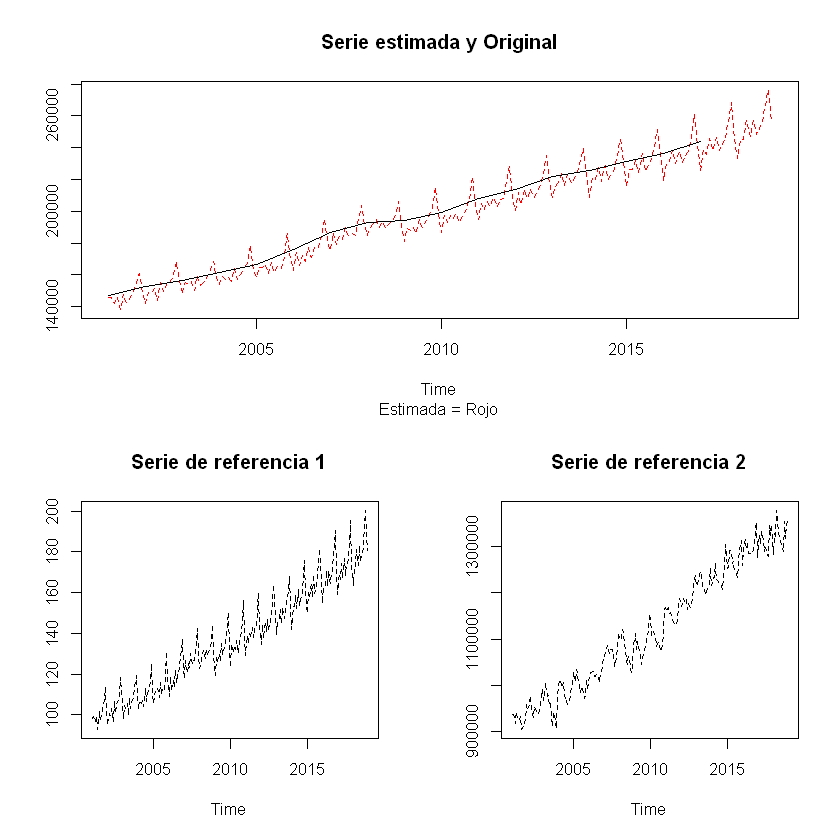

In [65]:
# Graficamos para comparar 
layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))
plot(tsbfa_cl_ml_d, col = "red",lwd = 1,lty= 2,main="Serie estimada y Original",ylab=" ",sub="Estimada = Rojo"
); lines(bf, col = "black",lwd = 1,lty= 1,ylab=" ",)
plot(tsaf_IMAE, col = "black",lwd = 1,lty= 2,main="Serie de referencia 1",ylab=" ",)
plot(tsaf_empleo, col = "black",lwd = 1,lty= 2,main="Serie de referencia 2",ylab=" ",)

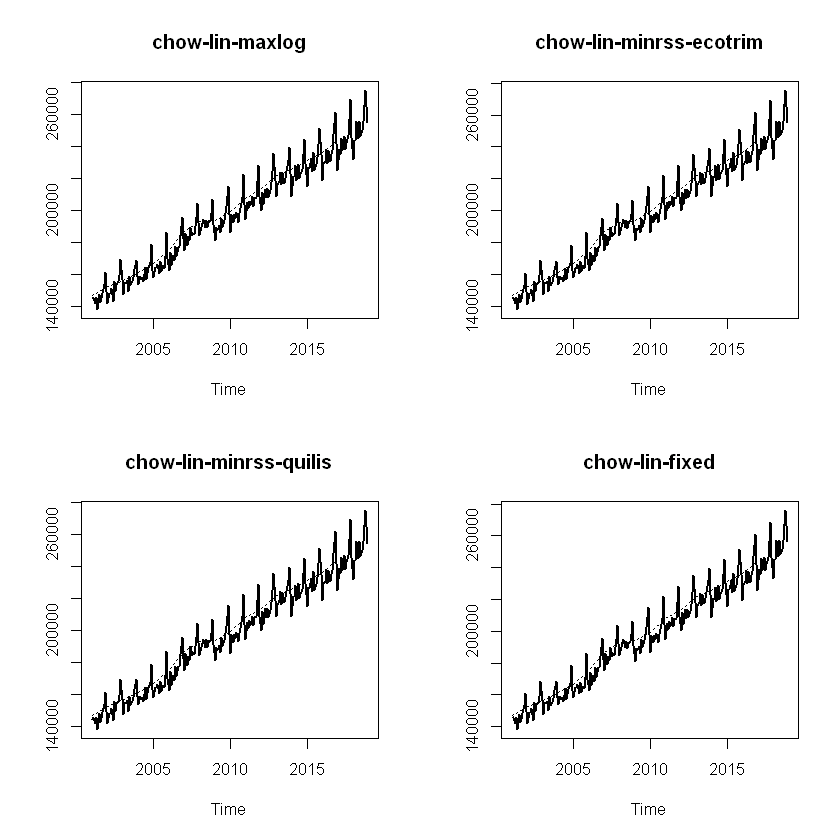

In [66]:
# Comparación de métodos
x11()
par(mfrow=c(2,2))
plot(tsbfa_cl_ml_a, lwd = 2, lty= 1, main="chow-lin-maxlog", ylab=" ");lines(bf, lwd = 1, lty= 3)
plot(tsbfa_cl_ml_b, lwd = 2, lty= 1, main="chow-lin-minrss-ecotrim", ylab=" ");lines(bf, lwd = 1, lty= 3)
plot(tsbfa_cl_ml_c, lwd = 2, lty= 1, main="chow-lin-minrss-quilis", ylab=" ");lines(bf, lwd = 1, lty= 3)
plot(tsbfa_cl_ml_d, lwd = 2, lty= 1, main="chow-lin-fixed", ylab=" ");lines(bf, lwd = 1, lty= 3)

In [67]:
# Indicadores de regresión
resumen_cl = matrix(c(compa_a,compa_b,compa_c,compa_d),nrow=3,ncol=4)
resumen_cl

-148.3887805,-149.5603426,-150.6102245,-157.0308601
0.9774288,0.9882712,0.9169879,0.9920462
0.9749116,0.9412972,0.9990000,0.5000000


In [68]:
# ----------------------------------------------------------------------------#
#                             Método 6 - "fernandez"
#                          Para series no cointegradas
#----------> Sin indicador se recomienda Denton
# ----------------------------------------------------------------------------#
# "fernandez"
fer = td(bf ~ 0 + tsaf1 + tsaf2,                # con indicador
             to = 12,                           # mensual
             method = "fernandez",
             conversion = criterio,             # consistente con la average
             truncated.rho = 0,                 # p autorregresivo no acepta negativos
             #fixed.rho = 0.5,                  # p autorregresivo fijo
            )

# Extraemos la serie resultante
fer_salida = predict(fer)

In [69]:
# Resumen del método
summary(fer)
logl_fer = summary(fer)$logl              # logl
rsqrt_fer = summary(fer)$adj.r.squared    # r cuadrado ajustado
rho_fer = summary(fer)$rho                # rho

compa_fer = c(logl_fer, rsqrt_fer, rho_fer)


Call:
td(formula = bf ~ 0 + tsaf1 + tsaf2, conversion = criterio, to = 12, 
    method = "fernandez", truncated.rho = 0)

Residuals:
   Min     1Q Median     3Q    Max 
 -1015   1076   2928   6195   7304 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
tsaf1 3.608e-02  2.019e-02   1.787   0.0942 .  
tsaf2 1.126e+03  1.856e+02   6.068 2.15e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

'fernandez' disaggregation with 'average' conversion
17 low-freq. obs. converted to 216 high-freq. obs.
Adjusted R-squared: 0.9101	AR1-Parameter:     0

In [70]:
# Pasamos los datos a Time Series
tsbfa_fer = ts(fer_salida,
                   start= c(2001,1),
                   end= c(2018,12),
                   frequency=12,
                   deltat=1/12,
                   ts.eps = 0.05,
                   class = "ts"
                    )

tsbfa_fer

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2001,144573.3,145329.5,142064.7,145688.9,138000.8,147828.7,142623.8,144906.3,148480.5,153613.5,161371.2,149253.1
2002,141569.0,148236.5,148166.7,151047.7,143391.1,155456.2,149388.6,153990.5,155481.1,159422.2,169221.4,156560.2
2003,147348.9,154992.4,154288.7,155883.6,149524.5,158856.7,153082.9,155494.8,158128.8,163137.5,169011.1,158543.5
2004,153674.7,158817.5,156862.3,158167.2,155466.8,164197.8,157042.9,160702.5,163850.3,167349.2,178620.2,162747.5
2005,157981.8,164138.1,164082.6,166286.1,160594.5,168183.2,161682.9,165605.4,164123.5,171506.3,186545.1,169933.9
2006,162183.6,174017.9,165640.2,171972.7,168449.8,177393.5,171124.8,177133.2,177662.2,184772.2,195705.0,182239.4
2007,174852.2,185354.1,178361.3,183971.0,181315.3,189639.5,184136.4,185968.6,185163.1,195439.5,204511.1,192490.6
2008,184065.0,189182.1,191949.3,194457.1,189411.4,194014.4,189236.6,192289.4,193873.1,198182.6,206899.9,191177.6
2009,180956.9,189166.3,187709.8,190667.8,186270.5,195366.9,189685.7,193904.6,198143.1,202516.5,215269.1,197257.7
2010,185876.9,197260.5,192594.0,197349.1,194799.6,198930.9,192871.1,197968.6,201230.1,208438.2,222425.2,203941.2


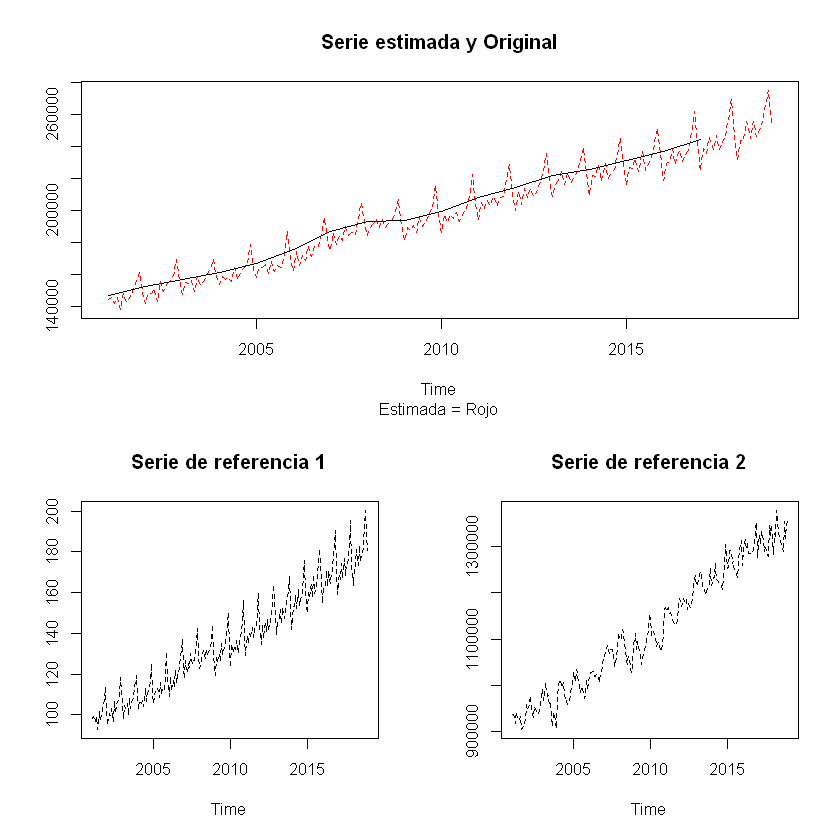

In [71]:
# Graficamos para comparar
layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))
plot(tsbfa_fer, col = "red",lwd = 1,lty= 2,main="Serie estimada y Original",ylab=" ",sub="Estimada = Rojo"
); lines(bf, col = "black",lwd = 1,lty= 1, ylab=" ",)
plot(tsaf_IMAE, col = "black",lwd = 1,lty= 2,main="Serie de referencia 1",ylab=" ",)
plot(tsaf_empleo, col = "black",lwd = 1,lty= 2,main="Serie de referencia 2",ylab=" ",)

In [72]:
# ----------------------------------------------------------------------------#
#                             Método 7 - "litterman"
#                          Para series no cointegradas
# Incluye:
#       a. "litterman-maxlog"
#       b. "litterman-minrss"
#       c. "litterman-fixed"
#----------> Sin indicador se recomienda Denton
# ----------------------------------------------------------------------------#
# a. "litterman-maxlog"
lit_a = td(bf ~ 0 + tsaf1 + tsaf2,          # con indicador
         to = 12,                           # mensual
         method = "litterman-maxlog",
         conversion = criterio,             # consistente con la average
         truncated.rho = 0,                 # p autorregresivo no acepta negativos
         #fixed.rho = 0.5,                  # p autorregresivo fijo
         )

# Extraemos la serie resultante
lit_a_salida = predict(lit_a)


In [73]:

# Resumen del método
summary(lit_a)
logl_lit_a = summary(lit_a)$logl              # logl
rsqrt_lit_a = summary(lit_a)$adj.r.squared    # r cuadrado ajustado
rho_lit_a = summary(lit_a)$rho                # rho

compa_lit_a = c(logl_lit_a, rsqrt_lit_a, rho_lit_a)


Call:
td(formula = bf ~ 0 + tsaf1 + tsaf2, conversion = criterio, to = 12, 
    method = "litterman-maxlog", truncated.rho = 0)

Residuals:
    Min      1Q  Median      3Q     Max 
-1524.8   852.7  2499.0  5905.1  6964.6 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
tsaf1 3.412e-02  2.060e-02   1.656    0.118    
tsaf2 1.144e+03  1.896e+02   6.034 2.29e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

'litterman-maxlog' disaggregation with 'average' conversion
17 low-freq. obs. converted to 216 high-freq. obs.
Adjusted R-squared: 0.8998	AR1-Parameter: 0.6581

In [74]:
# Pasamos los datos a Time Series
tsbfa_lit_a = ts(lit_a_salida,
               start= c(2001,1),
               end= c(2018,12),
               frequency=12,
               deltat=1/12,
               ts.eps = 0.05,
               class = "ts"
                )

tsbfa_lit_a

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2001,144516.5,145284.9,142015.5,145635.4,137866.1,147849.6,142545.4,144932.4,148555.7,153737.8,161597.2,149197.6
2002,141409.1,148162.1,148035.8,151042.5,143299.7,155497.6,149342.8,154044.6,155560.6,159552.8,169472.1,156511.4
2003,147194.1,154922.1,154135.2,155826.2,149360.2,158893.2,153015.2,155589.3,158190.9,163295.0,169336.0,158536.1
2004,153535.4,158734.5,156770.1,158114.1,155341.5,164292.4,157009.5,160759.0,163945.6,167455.1,178856.5,162685.2
2005,157788.0,164090.4,163961.7,166229.0,160496.2,168251.2,161611.5,165608.5,164156.7,171639.8,186828.5,170001.9
2006,162044.3,174033.1,165512.6,171931.7,168373.5,177448.2,171054.2,177154.3,177713.7,184885.0,195937.8,182206.2
2007,174713.5,185344.6,178197.9,183922.1,181238.4,189668.9,184079.9,185973.8,185223.6,195610.8,204776.0,192453.2
2008,183877.7,189067.3,191816.7,194389.8,189336.1,194077.6,189243.8,192298.3,193951.6,198367.3,207186.7,191125.5
2009,180709.7,189154.7,187630.1,190681.3,186208.5,195506.9,189688.0,193933.2,198197.0,202607.3,215506.2,197092.0
2010,185531.8,197191.1,192428.0,197279.2,194706.4,198973.5,192806.4,198008.5,201365.7,208666.5,222807.5,203921.0


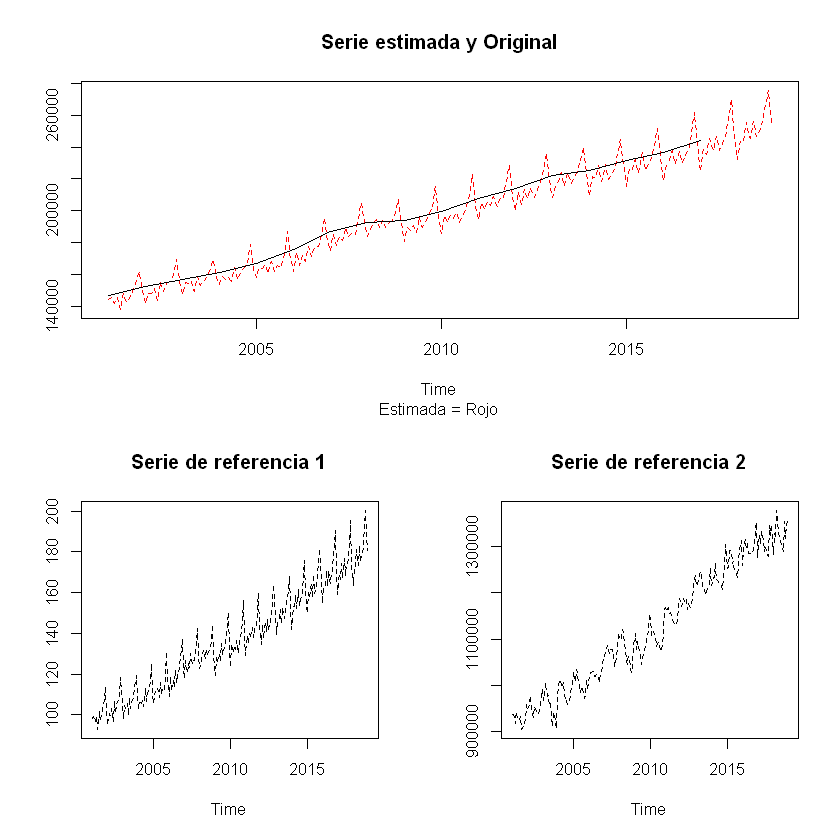

In [75]:
# Graficamos para comparar 
layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))
plot(tsbfa_lit_a, col = "red",lwd = 1,lty= 2,main="Serie estimada y Original",ylab=" ",sub="Estimada = Rojo"
); lines(bf, col = "black",lwd = 1,lty= 1,ylab=" ",)
plot(tsaf_IMAE, col = "black",lwd = 1,lty= 2,main="Serie de referencia 1",ylab=" ",)
plot(tsaf_empleo, col = "black",lwd = 1,lty= 2,main="Serie de referencia 2",ylab=" ",)

In [76]:
# b. "litterman-minrss"
lit_b = td(bf ~ 0 + tsaf1 + tsaf2,            # con indicador
           to = 12,                           # mensual
           method = "litterman-minrss",
           conversion = criterio,             # consistente con la average
           truncated.rho = 0,                 # p autorregresivo no acepta negativos
           #fixed.rho = 0.5,                  # p autorregresivo fijo
            )

# Extraemos la serie resultante
lit_b_salida = predict(lit_b)

In [77]:

# Resumen del método
summary(lit_b)
logl_lit_b = summary(lit_b)$logl              # logl
rsqrt_lit_b = summary(lit_b)$adj.r.squared    # r cuadrado ajustado
rho_lit_b = summary(lit_b)$rho                # rho

compa_lit_b = c(logl_lit_b, rsqrt_lit_b, rho_lit_b)


Call:
td(formula = bf ~ 0 + tsaf1 + tsaf2, conversion = criterio, to = 12, 
    method = "litterman-minrss", truncated.rho = 0)

Residuals:
    Min      1Q  Median      3Q     Max 
-4451.0   117.7  1570.5  4235.6  5013.6 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
tsaf1 2.296e-02  2.371e-02   0.968    0.348    
tsaf2 1.247e+03  2.186e+02   5.707 4.15e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

'litterman-minrss' disaggregation with 'average' conversion
17 low-freq. obs. converted to 216 high-freq. obs.
Adjusted R-squared: 0.5462	AR1-Parameter: 0.9978

In [78]:
# Pasamos los datos a Time Series
tsbfa_lit_b = ts(lit_b_salida,
                 start= c(2001,1),
                 end= c(2018,12),
                 frequency=12,
                 deltat=1/12,
                 ts.eps = 0.05,
                 class = "ts"
                 )

tsbfa_lit_b

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2001,144193.9,145024.6,141723.5,145316.5,137083.3,147955.5,142088.6,145077.3,148987.7,154459.8,162909.0,148914.4
2002,140539.6,147786.9,147340.2,151060.2,142816.0,155756.5,149084.6,154333.8,155971.4,160235.6,170831.4,156175.0
2003,146306.0,154533.1,153271.3,155502.1,148417.6,159091.0,152619.0,156123.4,158548.6,164203.8,171197.8,158479.6
2004,152663.3,158166.6,156156.3,157744.7,154587.3,164821.4,156834.9,161121.7,164549.8,168135.8,180292.8,162424.1
2005,156777.5,163909.7,163355.0,165972.8,159986.9,168667.4,161204.2,165595.7,164283.3,172308.4,188331.4,170271.2
2006,161158.8,174035.3,164698.9,171612.8,167862.2,177704.1,170626.4,177291.4,178073.2,185642.9,197416.7,182172.0
2007,174017.9,185378.1,177362.9,183750.3,180903.4,189918.7,183797.6,185983.7,185478.8,196432.5,206096.2,192082.5
2008,182818.3,188463.7,191092.0,193997.3,188860.4,194371.5,189221.1,192310.8,194402.5,199467.0,208887.6,190846.1
2009,179138.0,188886.6,187006.9,190654.6,185822.0,196334.5,189775.1,194197.1,198615.6,203235.2,216970.0,196279.4
2010,183769.6,197006.4,191659.2,197006.9,194242.4,199226.2,192393.5,198144.9,202009.4,209807.6,224806.4,203612.7


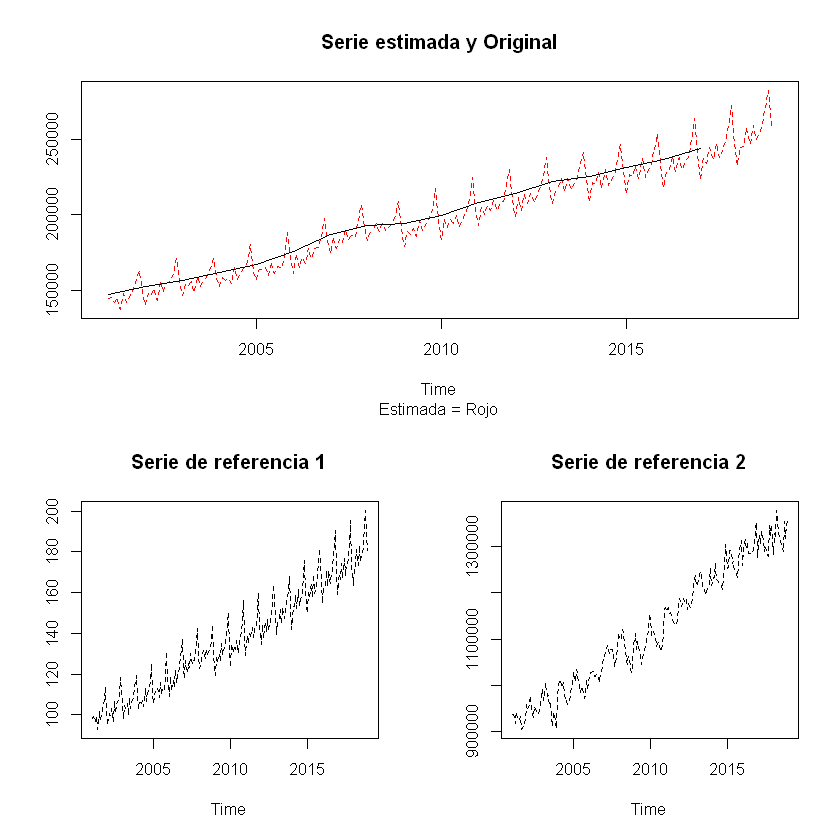

In [79]:
# Graficamos para comparar
layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))
plot(tsbfa_lit_b, col = "red",lwd = 1,lty= 2,main="Serie estimada y Original",ylab=" ",sub="Estimada = Rojo"
); lines(bf, col = "black",lwd = 1,lty= 1,ylab=" ",)
plot(tsaf_IMAE, col = "black",lwd = 1,lty= 2,main="Serie de referencia 1",ylab=" ",)
plot(tsaf_empleo, col = "black",lwd = 1,lty= 2,main="Serie de referencia 2",ylab=" ",)

In [80]:
# c. "litterman-fixed"
lit_c = td(bf ~ 0 + tsaf1 + tsaf2,            # con indicador
           to = 12,                           # mensual
           method = "litterman-fixed",
           conversion = criterio,             # consistente con la average
           truncated.rho = 0,                 # p autorregresivo no acepta negativos
           #fixed.rho = 0.5,                  # p autorregresivo fijo
            )

# Extraemos la serie resultante
lit_c_salida = predict(lit_c)

In [81]:
# Resumen del método
summary(lit_c)
logl_lit_c = summary(lit_c)$logl              # logl
rsqrt_lit_c = summary(lit_c)$adj.r.squared    # r cuadrado ajustado
rho_lit_c = summary(lit_c)$rho                # rho

compa_lit_c = c(logl_lit_c, rsqrt_lit_c, rho_lit_c)



Call:
td(formula = bf ~ 0 + tsaf1 + tsaf2, conversion = criterio, to = 12, 
    method = "litterman-fixed", truncated.rho = 0)

Residuals:
    Min      1Q  Median      3Q     Max 
-1219.5   863.2  2755.8  6079.2  7168.2 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
tsaf1 3.529e-02  2.035e-02   1.734    0.103    
tsaf2 1.134e+03  1.872e+02   6.055  2.2e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

'litterman-fixed' disaggregation with 'average' conversion
17 low-freq. obs. converted to 216 high-freq. obs.
Adjusted R-squared: 0.9062	AR1-Parameter:   0.5

In [82]:
# Pasamos los datos a Time Series
tsbfa_lit_c = ts(lit_c_salida,
                 start= c(2001,1),
                 end= c(2018,12),
                 frequency=12,
                 deltat=1/12,
                 ts.eps = 0.05,
                 class = "ts"
                 )

tsbfa_lit_c

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2001,144550.0,145311.5,142045.0,145667.5,137946.6,147837.4,142592.3,144917.0,148510.9,153663.6,161462.2,149230.1
2002,141503.5,148205.3,148112.5,151044.3,143352.9,155471.9,149369.5,154012.3,155514.1,159476.8,169325.2,156542.8
2003,147285.5,154962.9,154226.3,155860.9,149459.3,158872.9,153056.9,155534.0,158154.2,163200.5,169140.8,158539.3
2004,153621.0,158786.8,156827.1,158146.7,155416.4,164235.5,157028.5,160724.1,163887.4,167390.5,178714.1,162720.8
2005,157902.2,164117.5,164032.5,166261.8,160553.7,168209.9,161653.6,165606.8,164137.7,171561.9,186662.0,169963.9
2006,162127.7,174024.4,165589.8,171957.9,168421.2,177417.8,171098.1,177142.7,177682.6,184815.5,195795.1,182221.7
2007,174796.3,185350.1,178293.6,183947.9,181280.0,189647.0,184110.0,185968.8,185188.4,195512.9,204625.3,192482.3
2008,183985.4,189131.3,191894.2,194431.6,189385.1,194045.2,189244.7,192296.9,193906.1,198255.2,207010.7,191152.0
2009,180863.9,189168.9,187681.8,190674.1,186243.6,195419.8,189682.3,193912.0,198161.7,202551.5,215364.7,197190.6
2010,185732.4,197227.5,192523.5,197319.2,194761.8,198949.0,192846.6,197986.8,201287.3,208533.0,222582.3,203935.8


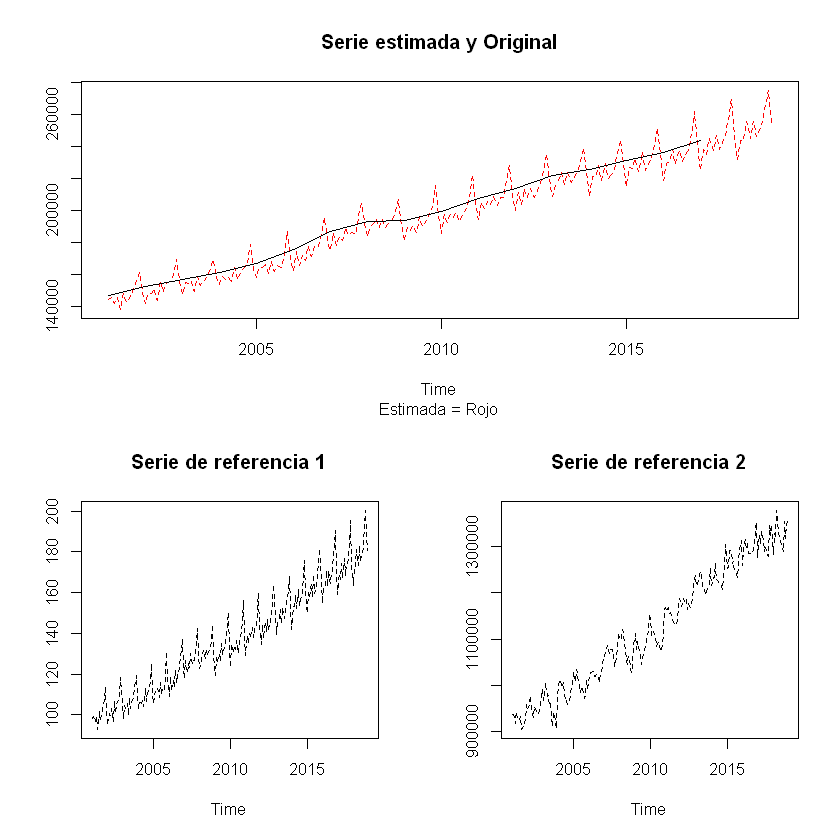

In [83]:
# Graficamos para comparar
layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))
plot(tsbfa_lit_c, col = "red",lwd = 1,lty= 2,main="Serie estimada y Original",ylab=" ",sub="Estimada = Rojo"
); lines(bf, col = "black",lwd = 1,lty= 1,ylab=" ",)
plot(tsaf_IMAE, col = "black",lwd = 1,lty= 2,main="Serie de referencia 1",ylab=" ",)
plot(tsaf_empleo, col = "black",lwd = 1,lty= 2,main="Serie de referencia 2",ylab=" ",)

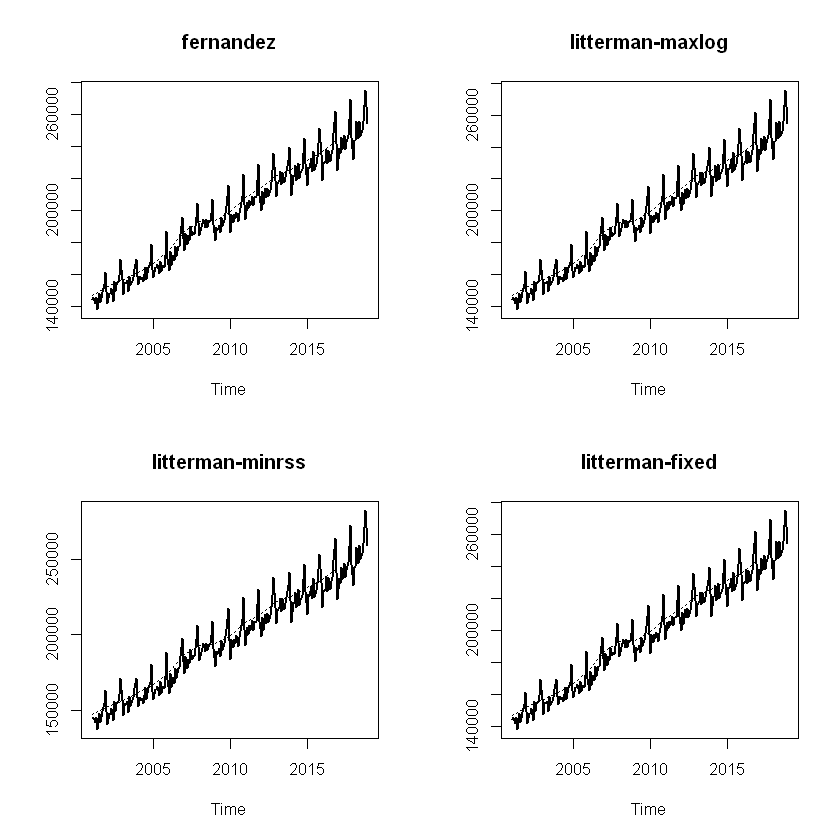

In [84]:
# Comparación de métodos para series no cointegradas
par(mfrow=c(2,2))
plot(tsbfa_fer, lwd = 2, lty= 1, main="fernandez", ylab=" ");lines(bf, lwd = 1, lty= 3)
plot(tsbfa_lit_a, lwd = 2, lty= 1, main="litterman-maxlog", ylab=" ");lines(bf, lwd = 1, lty= 3)
plot(tsbfa_lit_b, lwd = 2, lty= 1, main="litterman-minrss", ylab=" ");lines(bf, lwd = 1, lty= 3)
plot(tsbfa_lit_c, lwd = 2, lty= 1, main="litterman-fixed", ylab=" ");lines(bf, lwd = 1, lty= 3)

In [85]:
# Indicadores de regresión
resumen_no_coint = matrix(c(compa_fer,compa_lit_a,compa_lit_b,compa_lit_c),nrow=3,ncol=4)
resumen_no_coint

-148.2829611,-148.1618989,-154.3243355,-148.1928738
0.9100859,0.8997501,0.5462322,0.9061713
0.0000000,0.6581327,0.9978335,0.5000000


# Agregación

In [86]:
#install.packages("tempdisagg")
library(tempdisagg)
library(readxl)

In [87]:
# Importación de datos en excel
d_af = read_excel(path = "Mensual.xlsx")
d_bf = read_excel(path = "Anual.xlsx")

In [88]:
# Selección de columnas de trabajo
af = d_af$TOTAL # Serie de alta frecuencia (Mensual)
bf = d_bf$TOTAL # Serie de baja frecuencia (Anual), solo ejemplo

In [89]:
# Ejemplo de Agregación de Series temporale
# De alta frecuencia a baja frecuencia

# Despúes de cargar e identificar los datos que queremos trabajar, ahora debemos
# pasarlos a al objeto "ts", de Time Series
# Atributos del objeto
    # data          corresponde al vector de valores numéricos o matriz de datos
                    # un dataframe se convierte a data.matrix
    # start         punto de inicio de la serie, puede ser fecha
    # end           punto final de la serie
    # frequency     numero de observaciones por periodo
    # deltat        fración de la uestra del periodo entre las observaciones 
                    #(ej. mensual 1/12)
    # ts.eps        tolerancia de comparación de la serie de tiempo
                    # se consideran iguales las series si el valor absoluto de 
                    # las diferencias es menor que este indicador
    # class         ts para serie simple, mts, ts o matrix para series múltiples


In [90]:
# Ejemplo de serie mensual
tsaf = ts(af, start= c(1995, 1), end= c(2019, 12),  frequency=12, deltat=1/12, ts.eps = 0.05, class = "ts")
class(tsaf)
tsaf

[1] "ts"

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1995,10294.69,10484.68,11110.65,11016.43,11403.03,11301.38,11504.61,11897.58,12270.32,12175.19,12415.64,12713.50
1996,13191.75,13186.30,13300.19,13721.39,13560.76,13699.30,13852.90,13893.90,14034.50,14266.80,14230.80,14877.10
1997,15239.50,15725.50,15680.50,16158.00,16184.40,16316.90,16654.10,17387.10,17040.00,17894.70,18480.70,18606.50
1998,19894.20,19243.40,20402.70,20614.60,20675.10,21171.40,21280.60,21638.30,21825.80,22506.90,22353.40,22825.40
1999,22828.80,22441.80,22849.90,23283.50,23683.60,23823.80,23909.90,24866.40,24542.70,24280.40,24752.90,25500.30
2000,25486.80,25425.40,25588.90,25607.70,25401.60,25203.30,25750.20,26659.10,26608.60,25760.20,26461.20,27235.90
2001,28289.30,28393.00,29417.90,28886.80,29065.40,29377.00,28822.80,29356.90,30081.60,30805.60,30444.90,31251.70
2002,30151.60,30749.70,31693.80,30977.50,31822.30,32769.40,31896.30,32372.10,32533.00,31654.40,31699.60,32680.90
2003,31936.60,32034.10,32626.60,32305.00,33266.70,34115.10,33374.00,34926.40,35743.30,35293.30,35826.70,36696.10
2004,35424.00,35602.60,36330.70,35250.30,35772.80,36162.70,36182.30,37135.00,37653.70,39035.40,39148.20,40778.00


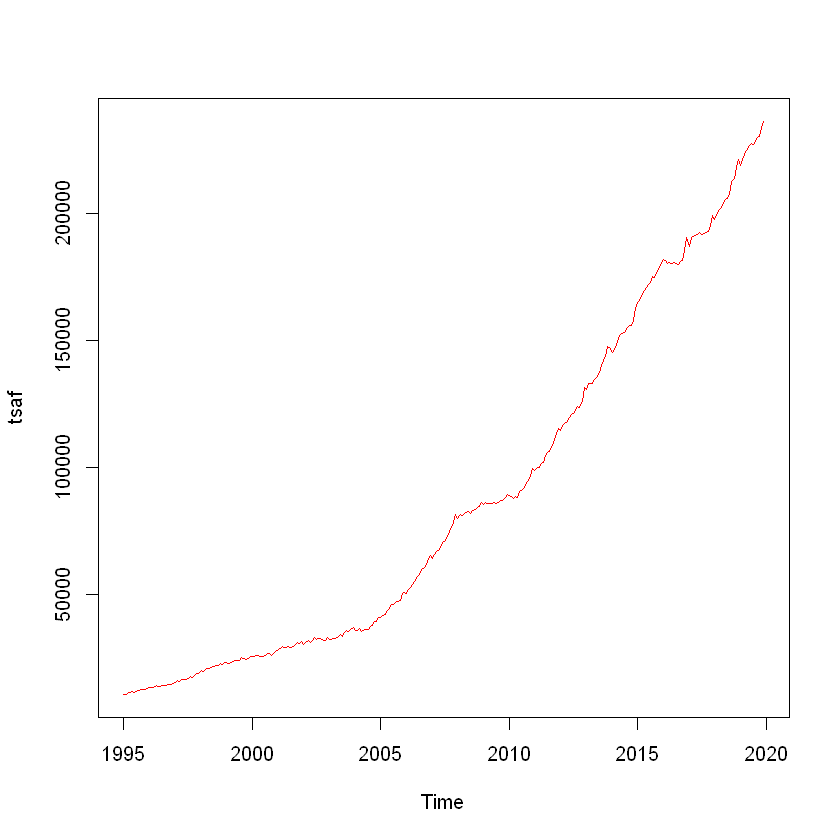

In [91]:
# Graficamos
plot(tsaf, col = "red")

In [92]:
# Agregación
# Usamos ta de Temporal Aggregation
# Criterios de agregación
    # sum           Para que la agregación indicada sea de forma suma
    # average       Para que la agregación sea de tipo promedio
    # first         Para que la agregación tome solo el primer valor
    # last          Para que la agregación tome solo el último valor

# Ejemplo de agregación de serie mensual a diferentes niveles
# Agregación
    # 1 = anual, 2 = semestral, 3 = cuatrimestre, 4 = trimestre, 6 = bimestre


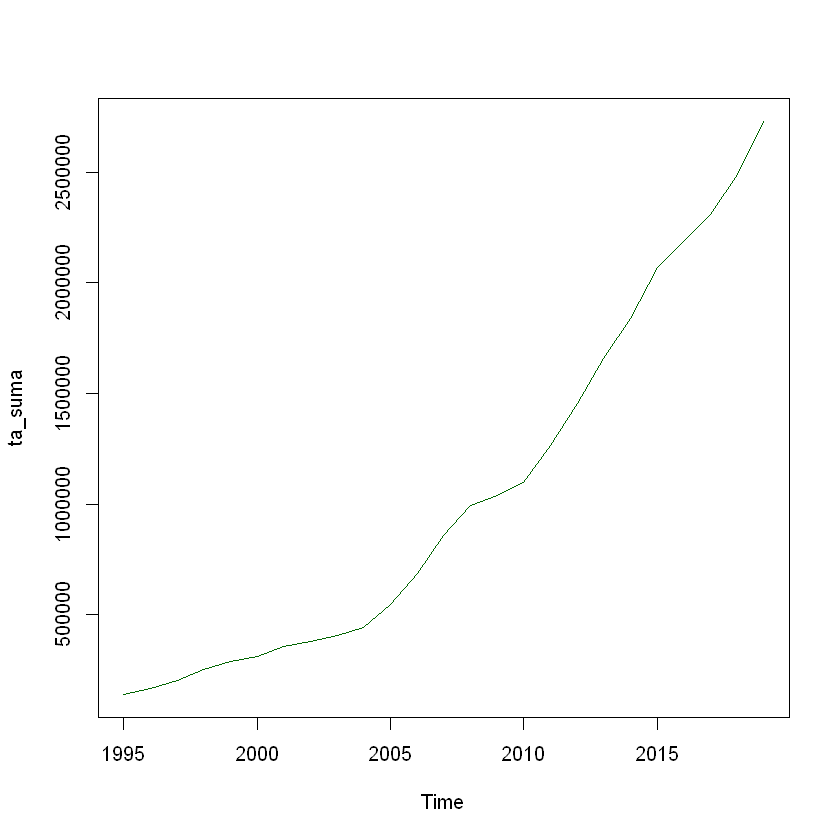

In [93]:
# Ejemplo de agregación de serie mensual a diferentes niveles
# Agregación
    # 1 = anual, 2 = semestral, 3 = cuatrimestre, 4 = trimestre, 6 = bimestre

agg = 1

ta_suma = ta(tsaf, conversion = "sum", to = agg)
ta_average = ta(tsaf, conversion = "average", to = agg)
ta_last = ta(tsaf, conversion = "last", to = agg)
ta_first = ta(tsaf, conversion = "first", to = agg)

# Graficas
plot(ta_suma, col = "darkgreen")


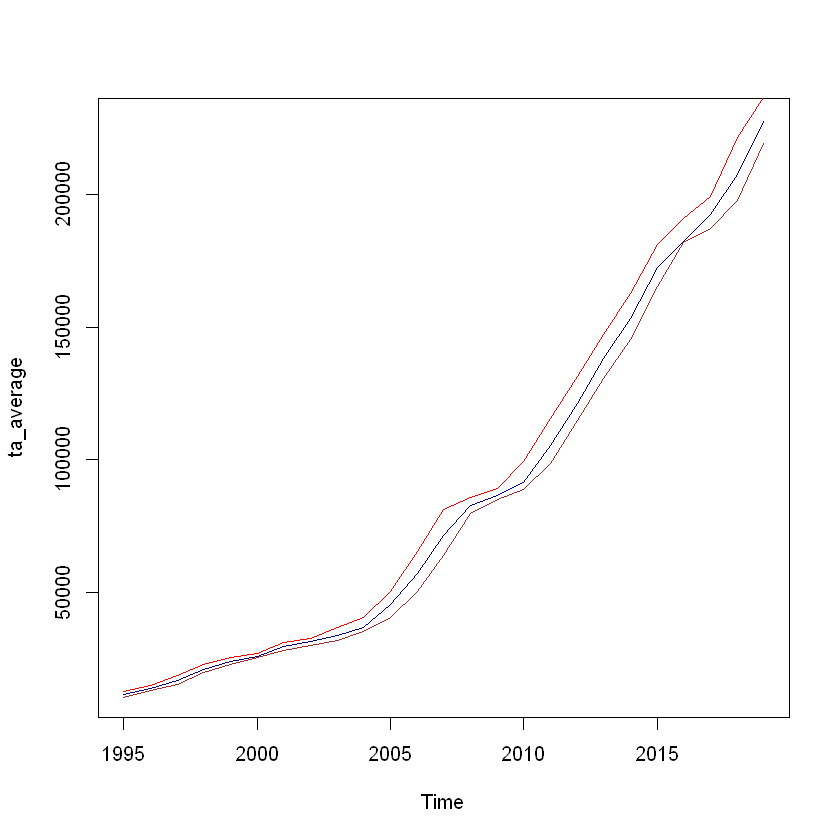

In [94]:
plot(ta_average, col = "navyblue")
lines(ta_first, col = "brown")
lines(ta_last, col = "red")

# Si aplicamos esta función a una salida de td, el resultado es la serie original.

In [95]:
# Para grupos de series de tiempo
# Matriz

# Extraemos los datos
af1 = d_af$TOTAL
af2 = d_af$PUBLICO
af3 = d_af$PRIVADO

In [96]:
# Creamos el objeto matrix, según las series a incluir, el punto inicial de la fecha
# y la cantidad de observaciones a incluir. IMPORTANTE, COLOCAR LA FRECUENCIA
series = ts(matrix(c(af1,af2,af3), 300, 3), start= c(1995, 1),  frequency=12)
series

,Series 1,Series 2,Series 3
Jan 1995,10294.69,458.7,9835.99
Feb 1995,10484.68,393.9,10090.78
Mar 1995,11110.65,698.9,10411.75
Apr 1995,11016.43,405.7,10610.73
May 1995,11403.03,566.7,10836.33
Jun 1995,11301.38,266.7,11034.68
Jul 1995,11504.61,354.7,11149.91
Aug 1995,11897.58,588.2,11309.38
Sep 1995,12270.32,770.1,11500.22
Oct 1995,12175.19,307.1,11868.09


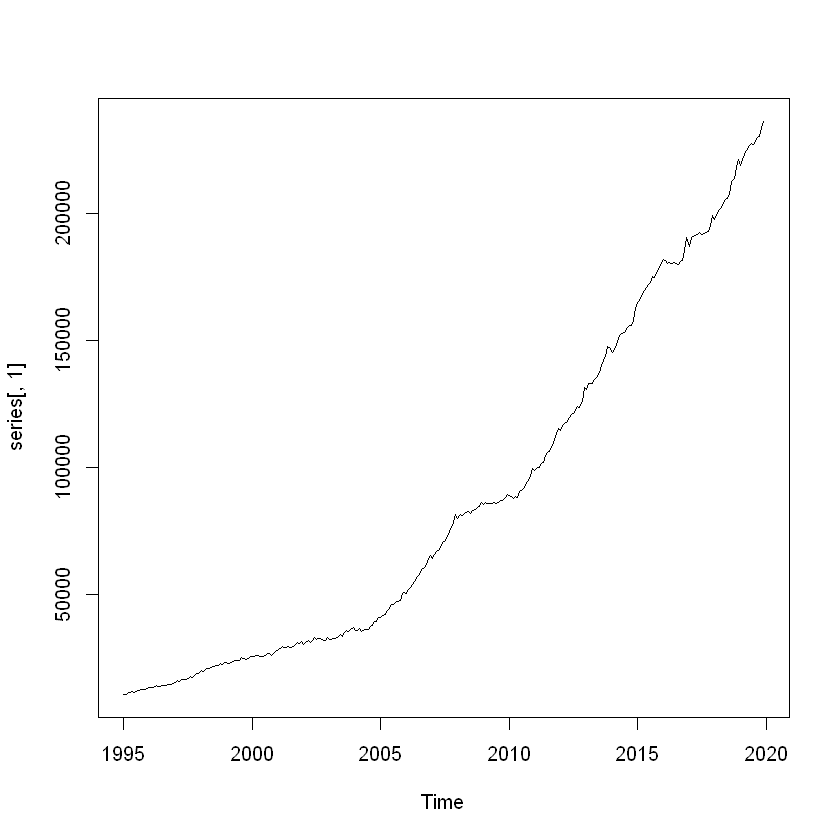

In [97]:
# Ahora podemos ver la gráfica
plot(series[,1], col = "black")

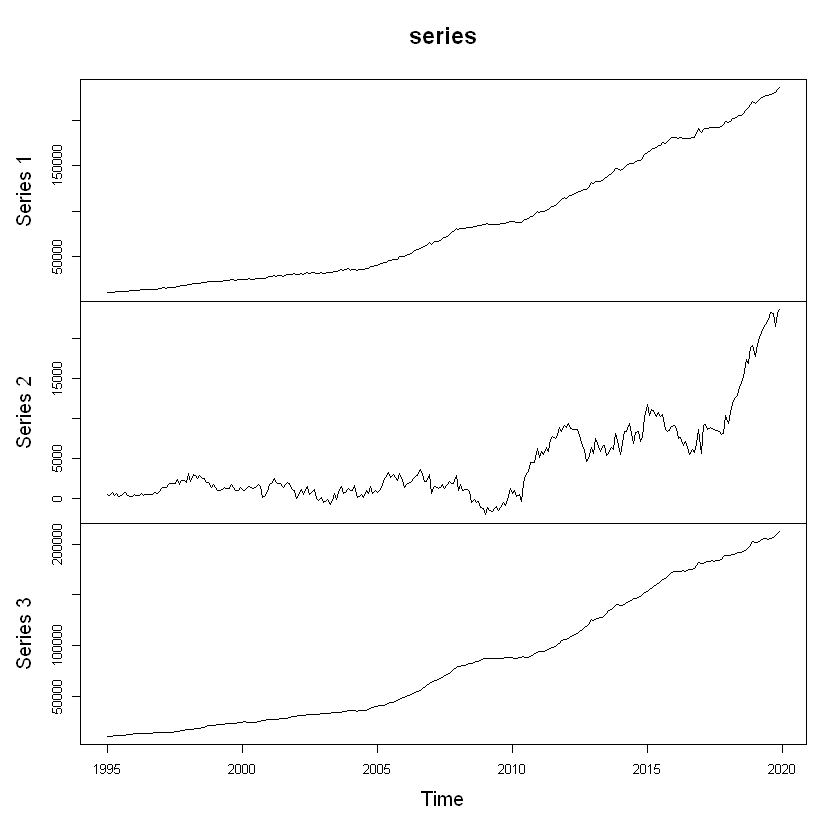

In [98]:
plot(series)

In [99]:
# Aplicamos el proceso de agregación, según lo que deseamos.
# para el ejemplo, criterio de agregación trimestral, con promedio
aggm = 4
mta = ta(series, conversion = "average", to = aggm)
mta

,Series 1,Series 2,Series 3
1995 Q1,10630.01,517.16667,10112.84
1995 Q2,11240.28,413.03333,10827.25
1995 Q3,11890.84,571.00000,11319.84
1995 Q4,12434.78,259.96667,12174.81
1996 Q1,13226.08,421.83333,12804.24
1996 Q2,13660.48,478.50000,13181.98
1996 Q3,13927.10,501.33333,13425.77
1996 Q4,14458.23,704.10000,13754.13
1997 Q1,15548.50,1316.90000,14231.60
1997 Q2,16219.77,1798.66667,14421.10


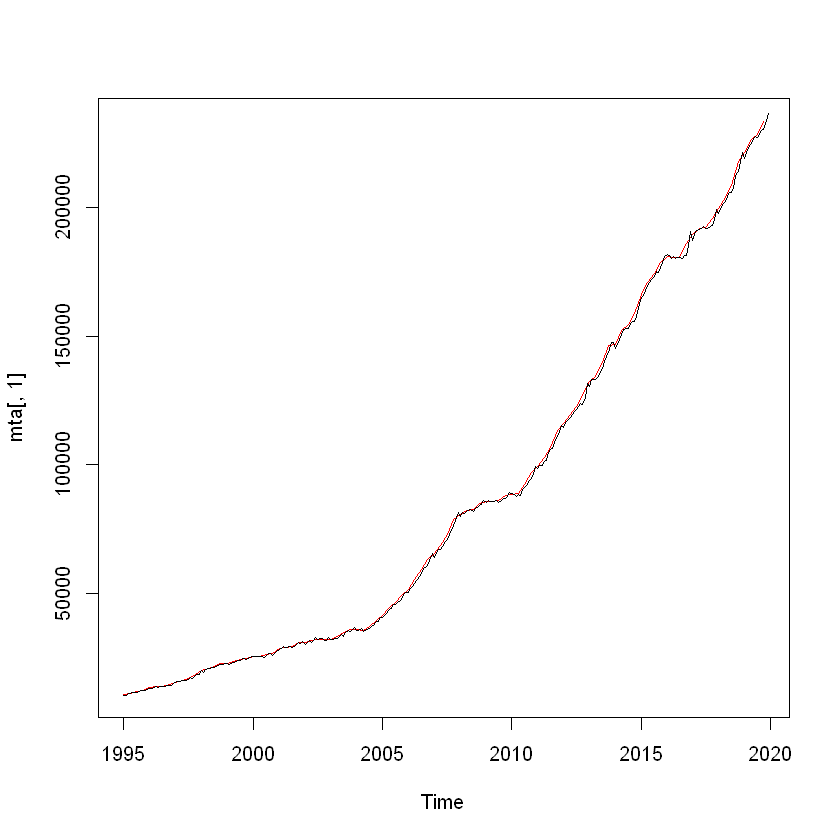

In [100]:
# Ahora podemos ver la gráfica
plot(mta[,1], col = "red")
lines(series[,1])

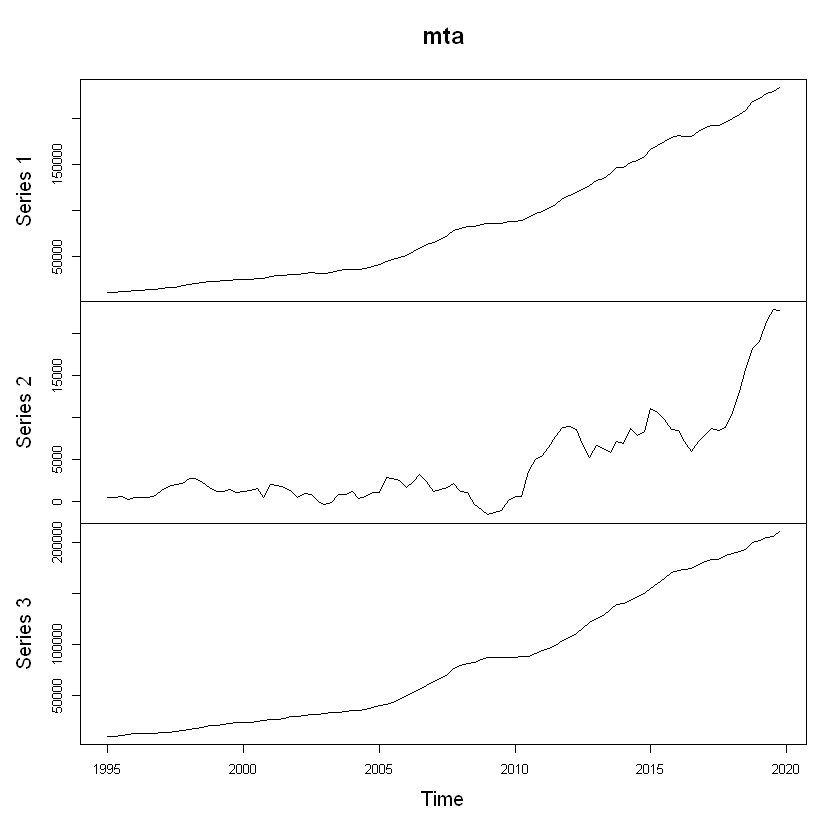

In [101]:
plot(mta)

# Gracias